In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer

In [13]:
seed = 666
np.random.seed(seed)

In [14]:
df_1 = pd.read_csv('df_1.csv')
df_2 = pd.read_csv('df_2.csv')
df_3 = pd.read_csv('df_3.csv')

In [15]:
df_1_c = df_1.copy()
df_2_c = df_2.copy()
df_3_c = df_3.copy()

In [16]:
df = pd.concat([df_1_c, df_2_c, df_3_c], axis = 0)
df = df.reset_index(drop = True)

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
df

,timestamp,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump
0,2019-12-24 20:21:38.990000010,-27.717755,-51.098985,3.236828,0,0,1,1,11.802369,3.236828,2.457934,1.793759,0.717635,-0.731628,0.106342,11.219029,11.243363,-0.719706,2.052307,-5.734762,6.133305,11.640243,11.500847,11.034913,11.178157,1,0,0,0
1,2019-12-24 20:21:39.000000000,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.693321,-0.030127,11.040661,11.062450,-0.498454,1.902262,-3.115336,3.684071,11.655013,11.715343,11.057294,11.239022,1,0,0,0
2,2019-12-24 20:21:39.009999990,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.829192,0.115919,11.173141,11.204466,-0.139872,1.258850,-2.545675,2.843365,11.604243,11.809643,11.396549,11.211858,1,0,0,0
3,2019-12-24 20:21:39.019999981,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.963666,0.234233,11.747150,11.788938,-0.310262,0.890096,-0.600179,1.117474,11.444361,11.484994,11.546067,11.694704,1,0,0,0
4,2019-12-24 20:21:39.029999971,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.666985,-0.276929,11.051834,11.075405,-1.070658,-0.384013,0.910441,1.456941,11.456193,11.666853,11.355733,11.365829,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344198,2019-12-24 21:53:23.950000048,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-0.912989,-1.304042,10.935516,11.050773,0.859578,2.380371,-0.091553,2.532474,11.142183,11.236468,11.084578,11.219388,1,0,0,0
344199,2019-12-24 21:53:23.960000038,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.274114,-1.855506,11.222022,11.445525,-0.605265,-1.022339,-0.523885,1.298452,11.493950,11.254312,11.759345,12.291465,1,0,0,0
344200,2019-12-24 21:53:23.970000029,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.363099,-1.665965,11.078370,11.285556,-0.986735,-2.176921,-0.597636,2.463696,11.023920,11.491217,11.567065,11.503020,1,0,0,0
344201,2019-12-24 21:53:23.980000019,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.038285,-1.295263,11.232597,11.354601,0.287374,-0.864665,-0.559489,1.069232,11.422023,11.542409,11.175456,10.719307,1,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344203 entries, 0 to 344202
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   timestamp              344203 non-null  object 
 1   latitude               344203 non-null  float64
 2   longitude              344203 non-null  float64
 3   speed                  344203 non-null  float64
 4   unpaved_road           344203 non-null  int64  
 5   cobblestone_road       344203 non-null  int64  
 6   asphalt_road           344203 non-null  int64  
 7   no_speed_bump          344203 non-null  int64  
 8   Speed_Target           344203 non-null  float64
 9   speed_t-1              344203 non-null  float64
 10  speed_t-2              344203 non-null  float64
 11  speed_t-3              344203 non-null  float64
 12  speed_t-4              344203 non-null  float64
 13  acc_x_avg              344203 non-null  float64
 14  acc_y_avg              344203 non-nu

In [20]:
df_clus = df.select_dtypes(include = ['float64','int64']).copy()

In [21]:
df_clus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344203 entries, 0 to 344202
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   latitude               344203 non-null  float64
 1   longitude              344203 non-null  float64
 2   speed                  344203 non-null  float64
 3   unpaved_road           344203 non-null  int64  
 4   cobblestone_road       344203 non-null  int64  
 5   asphalt_road           344203 non-null  int64  
 6   no_speed_bump          344203 non-null  int64  
 7   Speed_Target           344203 non-null  float64
 8   speed_t-1              344203 non-null  float64
 9   speed_t-2              344203 non-null  float64
 10  speed_t-3              344203 non-null  float64
 11  speed_t-4              344203 non-null  float64
 12  acc_x_avg              344203 non-null  float64
 13  acc_y_avg              344203 non-null  float64
 14  acc_z_avg              344203 non-nu

In [22]:
df_clus = df_clus.drop(columns = ['latitude', 'longitude','Speed_Target']).copy()

In [23]:
df_clus.isnull().sum()

speed                    0
unpaved_road             0
cobblestone_road         0
asphalt_road             0
no_speed_bump            0
speed_t-1                0
speed_t-2                0
speed_t-3                0
speed_t-4                0
acc_x_avg                0
acc_y_avg                0
acc_z_avg                0
acc_magnitude_avg        0
gyro_x_avg               0
gyro_y_avg               0
gyro_z_avg               0
gyro_magnitude_avg       0
acc_magnitude_avg_t-1    0
acc_magnitude_avg_t-2    0
acc_magnitude_avg_t-3    0
acc_magnitude_avg_t-4    0
good_road                0
regular_road             0
bad_road                 0
speed_bump               0
dtype: int64

In [24]:
df_clus

,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump
0,3.236828,0,0,1,1,3.236828,2.457934,1.793759,0.717635,-0.731628,0.106342,11.219029,11.243363,-0.719706,2.052307,-5.734762,6.133305,11.640243,11.500847,11.034913,11.178157,1,0,0,0
1,4.299495,0,0,1,1,3.236828,3.236828,2.457934,1.793759,-0.693321,-0.030127,11.040661,11.062450,-0.498454,1.902262,-3.115336,3.684071,11.655013,11.715343,11.057294,11.239022,1,0,0,0
2,4.299495,0,0,1,1,3.236828,3.236828,2.457934,1.793759,-0.829192,0.115919,11.173141,11.204466,-0.139872,1.258850,-2.545675,2.843365,11.604243,11.809643,11.396549,11.211858,1,0,0,0
3,4.299495,0,0,1,1,3.236828,3.236828,2.457934,1.793759,-0.963666,0.234233,11.747150,11.788938,-0.310262,0.890096,-0.600179,1.117474,11.444361,11.484994,11.546067,11.694704,1,0,0,0
4,4.299495,0,0,1,1,3.236828,3.236828,2.457934,1.793759,-0.666985,-0.276929,11.051834,11.075405,-1.070658,-0.384013,0.910441,1.456941,11.456193,11.666853,11.355733,11.365829,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344198,7.512348,0,0,1,1,8.633176,9.115602,11.253605,12.879133,-0.912989,-1.304042,10.935516,11.050773,0.859578,2.380371,-0.091553,2.532474,11.142183,11.236468,11.084578,11.219388,1,0,0,0
344199,7.512348,0,0,1,1,8.633176,9.115602,11.253605,12.879133,-1.274114,-1.855506,11.222022,11.445525,-0.605265,-1.022339,-0.523885,1.298452,11.493950,11.254312,11.759345,12.291465,1,0,0,0
344200,7.512348,0,0,1,1,8.633176,9.115602,11.253605,12.879133,-1.363099,-1.665965,11.078370,11.285556,-0.986735,-2.176921,-0.597636,2.463696,11.023920,11.491217,11.567065,11.503020,1,0,0,0
344201,7.512348,0,0,1,1,8.633176,9.115602,11.253605,12.879133,-1.038285,-1.295263,11.232597,11.354601,0.287374,-0.864665,-0.559489,1.069232,11.422023,11.542409,11.175456,10.719307,1,0,0,0


## Reduccion de Dimnesiones

In [25]:
lst_float = df_clus.select_dtypes(include = ['float64']).columns

In [26]:
sclr = StandardScaler()
X_Din = pd.DataFrame(sclr.fit_transform(df_clus[lst_float]), columns = lst_float, index = df_clus.index )

In [27]:
X_Din.describe()

,speed,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4
count,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05
mean,3.154270e-17,-4.576376e-16,-6.897902e-17,5.431208e-17,-5.660346e-17,-9.908703e-17,-2.406989e-17,-6.973146e-16,6.871479e-16,-4.263322e-17,1.281422e-17,2.017866e-17,-4.175692e-16,-8.206883e-16,-1.516978e-15,-1.194412e-16,2.092530e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.506959e+00,-1.505883e+00,-1.504470e+00,-1.502675e+00,-1.500437e+00,-8.869429e+00,-8.787862e+00,-8.779340e+00,-5.610278e+00,-7.313358e+00,-7.842677e+00,-6.523296e+00,-1.475274e+00,-5.610318e+00,-5.610441e+00,-5.610645e+00,-5.610851e+00
25%,-7.549098e-01,-7.544977e-01,-7.550614e-01,-7.543310e-01,-7.536508e-01,-5.491628e-01,-4.794800e-01,-4.624803e-01,-4.823742e-01,-5.617635e-01,-5.416522e-01,-4.633077e-01,-7.195887e-01,-4.823579e-01,-4.823369e-01,-4.822525e-01,-4.822165e-01
50%,-4.688211e-01,-4.694330e-01,-4.695447e-01,-4.691098e-01,-4.696366e-01,-1.348159e-02,1.783641e-02,2.670538e-03,-2.552881e-02,-1.094566e-02,-2.733124e-03,1.213349e-02,-2.227453e-01,-2.549608e-02,-2.540563e-02,-2.543337e-02,-2.539171e-02
75%,1.042190e+00,1.042365e+00,1.042657e+00,1.043066e+00,1.043676e+00,5.697752e-01,4.822910e-01,4.665059e-01,4.556056e-01,5.526325e-01,5.358617e-01,4.729844e-01,4.778840e-01,4.555598e-01,4.555282e-01,4.554970e-01,4.554404e-01
max,2.380147e+00,2.379849e+00,2.379552e+00,2.379234e+00,2.378989e+00,8.626452e+00,8.597642e+00,8.300204e+00,8.318399e+00,8.053538e+00,8.351486e+00,6.980240e+00,1.063150e+01,8.318487e+00,8.318607e+00,8.318927e+00,8.319237e+00


In [28]:
lst_bin = df_clus.drop(columns = lst_float).columns

In [29]:
X_clus = pd.concat([X_Din, df_clus[lst_bin]], axis = 1) 

In [30]:
X_clus

,speed,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,good_road,regular_road,bad_road,speed_bump
0,-1.039596,-1.038686,-1.150074,-1.244432,-1.397738,0.019113,0.136114,-0.068564,-0.150037,-0.329243,0.241434,-1.157603,-0.386196,0.053461,-0.018035,-0.256935,-0.183493,0,0,1,1,1,0,0,0
1,-0.885856,-1.038686,-1.037478,-1.148472,-1.242359,0.057983,0.050322,-0.159024,-0.242794,-0.267569,0.222303,-0.639397,-0.823561,0.061034,0.091943,-0.245459,-0.152283,0,0,1,1,1,0,0,0
2,-0.885856,-1.038686,-1.037478,-1.148472,-1.242359,-0.079885,0.142134,-0.091837,-0.169980,-0.167613,0.140265,-0.526700,-0.973688,0.035003,0.140294,-0.071507,-0.166212,0,0,1,1,1,0,0,0
3,-0.885856,-1.038686,-1.037478,-1.148472,-1.242359,-0.216336,0.216512,0.199274,0.129687,-0.215110,0.093248,-0.141819,-1.281884,-0.046972,-0.026164,0.005158,0.081375,0,0,1,1,1,0,0,0
4,-0.885856,-1.038686,-1.037478,-1.148472,-1.242359,0.084706,-0.104831,-0.153358,-0.236151,-0.427072,-0.069206,0.157030,-1.221265,-0.040905,0.067081,-0.092436,-0.087261,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344198,-0.421041,-0.258253,-0.187649,0.122328,0.358233,-0.164914,-0.750527,-0.212349,-0.248781,0.110986,0.283264,-0.041196,-1.029204,-0.201904,-0.153590,-0.231470,-0.162351,0,0,1,1,1,0,0,0
344199,-0.421041,-0.258253,-0.187649,0.122328,0.358233,-0.531347,-1.097206,-0.067046,-0.046385,-0.297343,-0.150595,-0.126726,-1.249566,-0.021546,-0.144441,0.114516,0.387375,0,0,1,1,1,0,0,0
344200,-0.421041,-0.258253,-0.187649,0.122328,0.358233,-0.621640,-0.978051,-0.139900,-0.128404,-0.403678,-0.297809,-0.141316,-1.041486,-0.262540,-0.022973,0.015925,-0.016914,0,0,1,1,1,0,0,0
344201,-0.421041,-0.258253,-0.187649,0.122328,0.358233,-0.292052,-0.745008,-0.061684,-0.093003,-0.048518,-0.130491,-0.133769,-1.290499,-0.058424,0.003275,-0.184872,-0.418776,0,0,1,1,1,0,0,0


In [65]:
tsne = TSNE(n_components=2, perplexity=40, random_state = seed)
X_tsne = tsne.fit_transform(X_clus)

[]

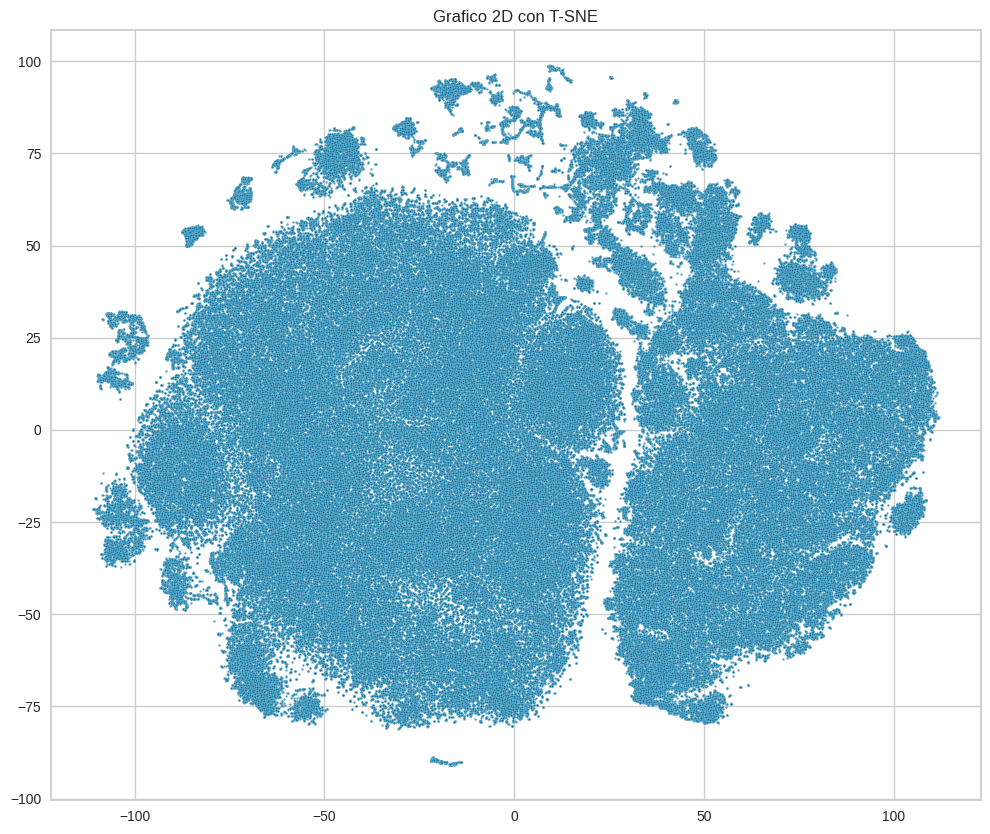

In [66]:
plt.figure(figsize = (12,10))
plt.title('Grafico 2D con T-SNE')
sns.scatterplot(
    x = X_tsne[:,0],
    y = X_tsne[:,1],
    alpha = 0.7,
    s = 3
)
plt.plot()

In [31]:
X_sample = X_clus.sample(n = 20000 , random_state=seed)

In [54]:
X_sample

,speed,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,good_road,regular_road,bad_road,speed_bump,Grupo_A
66933,-0.517742,-0.438918,-0.424303,-0.405688,-0.362701,0.008788,0.160070,-1.208017,-1.298169,0.329328,0.299477,0.608825,-0.699185,-0.800483,-0.629725,2.597929,0.415123,0,1,0,1,0,0,1,0,0
342015,1.449937,1.449932,1.443105,1.437082,1.431483,-0.274439,-0.382776,-0.289453,-0.348877,-0.312230,1.223940,0.066470,0.266908,-0.115083,0.630396,-0.546772,-0.584388,0,0,1,1,1,0,0,0,1
243923,1.461980,1.458039,1.455060,1.464670,1.463970,1.193319,0.140127,0.217083,0.130482,0.089719,0.842935,0.024711,-0.263703,-0.685366,-0.141348,-0.171111,0.642185,0,0,1,1,1,0,0,0,1
79422,-0.905110,-0.726457,-0.626270,-0.554781,-0.545112,1.531612,1.648758,-0.738616,-0.664521,-0.732609,0.581258,-0.936736,-0.240664,1.035973,-0.254088,0.131319,0.454692,0,1,0,1,0,0,1,0,0
2358,1.129648,1.078287,1.024856,0.974088,0.902335,0.374007,0.483922,0.085946,0.006600,0.875183,0.968748,0.073513,0.048152,-0.447131,0.516403,0.225964,-0.168812,0,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268043,-0.549151,-0.561382,-0.549651,-0.546425,-0.545641,0.962325,0.329898,0.763688,0.683071,-0.777979,-0.127249,0.295889,-0.953797,0.597881,-1.573969,-1.961843,1.045127,1,0,0,1,0,1,0,0,0
260411,1.646222,1.665201,1.699136,1.713461,1.722288,-1.095911,-0.286574,0.316717,0.305063,0.346342,0.352979,0.726385,-0.573986,-0.259366,-0.242068,-0.534498,-1.570716,0,0,1,1,1,0,0,0,1
170939,-0.737937,-0.859210,-0.848568,-0.916697,-0.966712,1.344954,1.340585,0.316650,0.320808,-0.487329,0.542023,-0.648956,-0.485409,-0.054834,2.512065,-1.498855,-0.170607,1,0,0,1,0,1,1,0,0
264390,0.654250,0.758929,0.810386,0.851178,0.887931,0.025591,-0.795931,0.172460,0.133974,0.537037,-0.537113,-0.094023,-0.638845,-0.492716,0.629776,-0.206332,0.005378,0,0,1,1,1,0,0,0,1


## Clustering Jerarquico

In [33]:
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
range_clusters = range(2,10)

for i in range_clusters:
    clusterer = AgglomerativeClustering(n_clusters=i, metric = 'euclidean', linkage='ward')
    c_labels = clusterer.fit_predict(X_sample)
    sil_avg = silhouette_score(X_sample, c_labels)
    silhouette_scores.append(sil_avg)
    davies_bouldin_ = davies_bouldin_score(X_sample, c_labels); 
    davies_bouldin_scores.append(davies_bouldin_)
    calinski_harabasz_ = calinski_harabasz_score(X_sample, c_labels); 
    calinski_harabasz_scores.append(calinski_harabasz_)

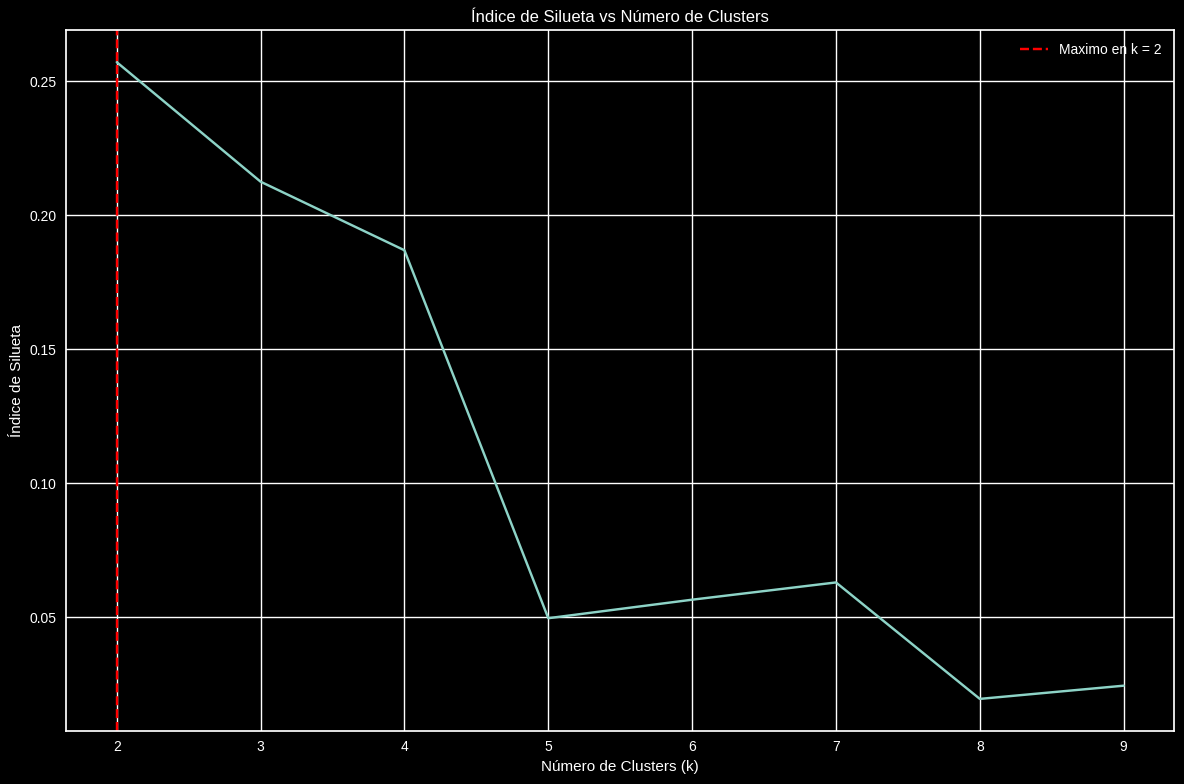

In [34]:
max_score = max(silhouette_scores)
best = range_clusters[silhouette_scores.index(max_score)]
plt.style.use('dark_background')
plt.figure(figsize = (12,8))
plt.plot(range_clusters, silhouette_scores,linestyle='-')
plt.axvline(x = best, color = 'red', linestyle='--', label = f'Maximo en k = {best}')
plt.title('Índice de Silueta vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silueta')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

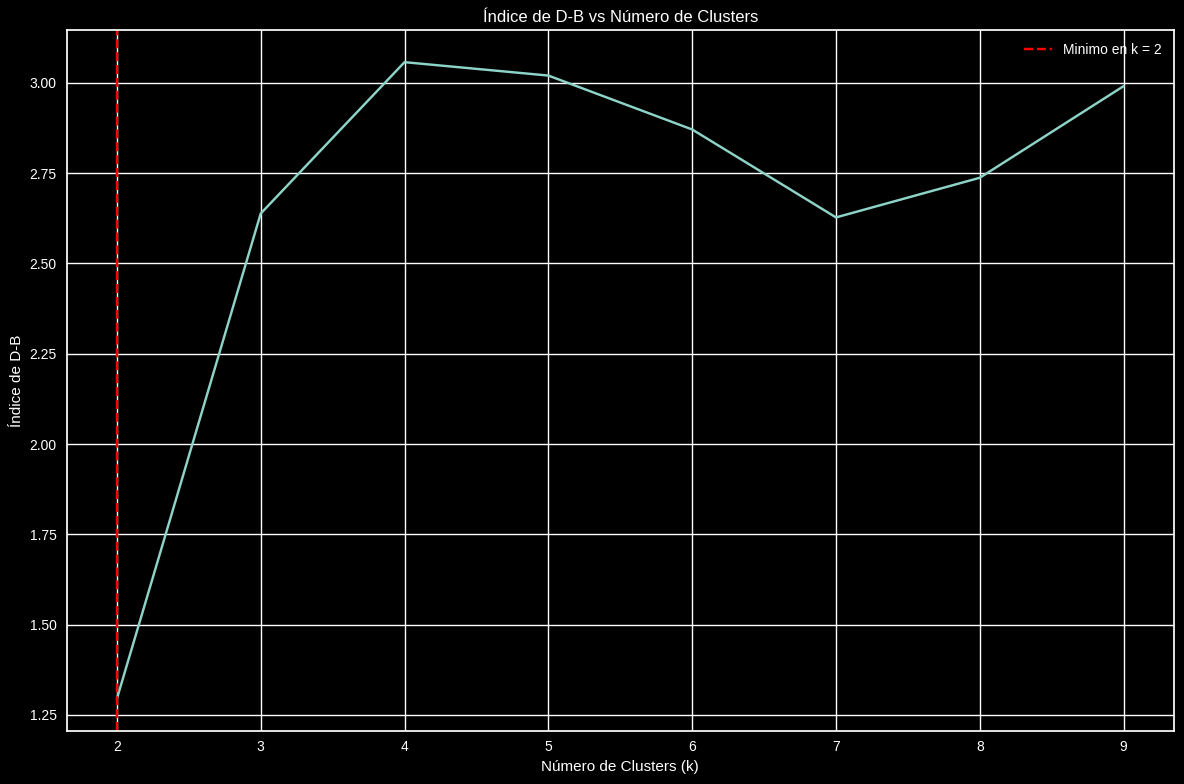

In [35]:
min_score = min(davies_bouldin_scores)
best = range_clusters[davies_bouldin_scores.index(min_score)]
plt.style.use('dark_background')
plt.figure(figsize = (12,8))
plt.plot(range_clusters, davies_bouldin_scores,linestyle='-')
plt.axvline(x = best, color = 'red', linestyle='--', label = f'Minimo en k = {best}')
plt.title('Índice de D-B vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de D-B')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

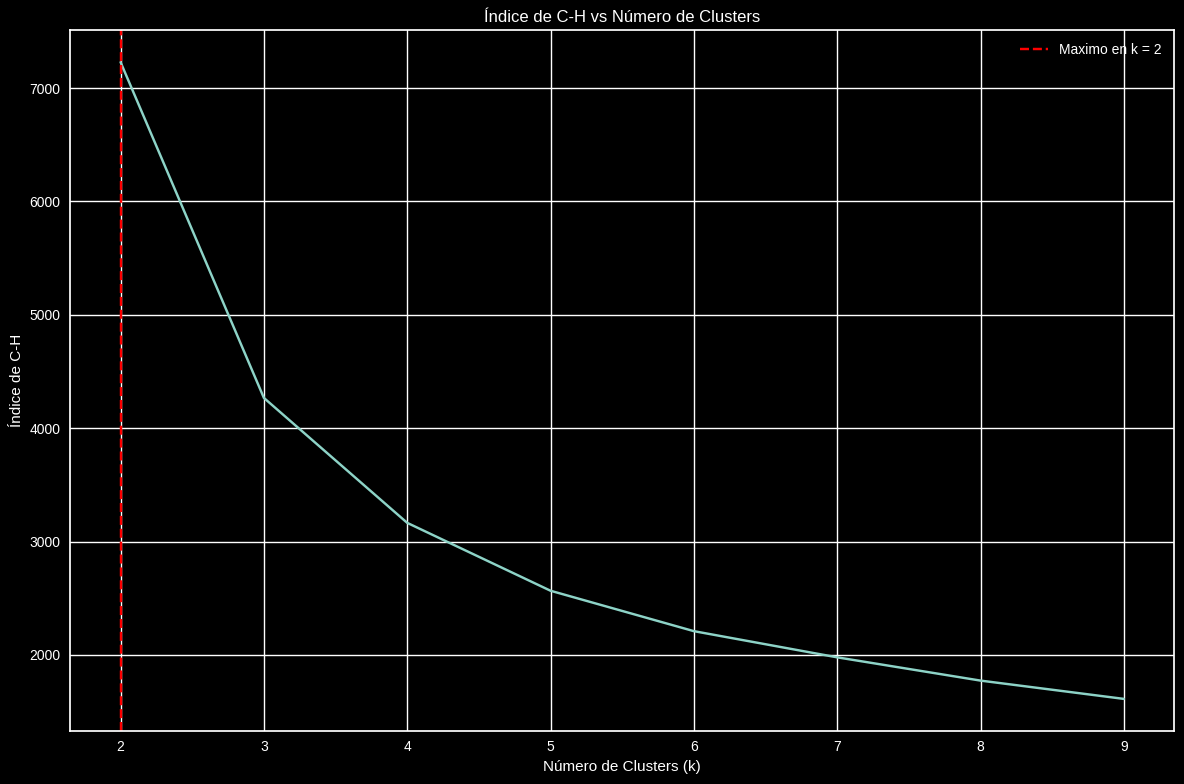

In [36]:
max_score = max(calinski_harabasz_scores)
best = range_clusters[calinski_harabasz_scores.index(max_score)]
plt.style.use('dark_background')
plt.figure(figsize = (12,8))
plt.plot(range_clusters, calinski_harabasz_scores,linestyle='-')
plt.axvline(x = best, color = 'red', linestyle='--', label = f'Maximo en k = {best}')
plt.title('Índice de C-H vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de C-H')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
clusterer = AgglomerativeClustering(n_clusters=2, metric = 'euclidean', linkage='ward')
c_labels = clusterer.fit_predict(X_sample)
X_sample['Grupo_A'] = c_labels

In [40]:
X_sample

,speed,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,good_road,regular_road,bad_road,speed_bump,Grupo_A
66933,-0.517742,-0.438918,-0.424303,-0.405688,-0.362701,0.008788,0.160070,-1.208017,-1.298169,0.329328,0.299477,0.608825,-0.699185,-0.800483,-0.629725,2.597929,0.415123,0,1,0,1,0,0,1,0,0
342015,1.449937,1.449932,1.443105,1.437082,1.431483,-0.274439,-0.382776,-0.289453,-0.348877,-0.312230,1.223940,0.066470,0.266908,-0.115083,0.630396,-0.546772,-0.584388,0,0,1,1,1,0,0,0,1
243923,1.461980,1.458039,1.455060,1.464670,1.463970,1.193319,0.140127,0.217083,0.130482,0.089719,0.842935,0.024711,-0.263703,-0.685366,-0.141348,-0.171111,0.642185,0,0,1,1,1,0,0,0,1
79422,-0.905110,-0.726457,-0.626270,-0.554781,-0.545112,1.531612,1.648758,-0.738616,-0.664521,-0.732609,0.581258,-0.936736,-0.240664,1.035973,-0.254088,0.131319,0.454692,0,1,0,1,0,0,1,0,0
2358,1.129648,1.078287,1.024856,0.974088,0.902335,0.374007,0.483922,0.085946,0.006600,0.875183,0.968748,0.073513,0.048152,-0.447131,0.516403,0.225964,-0.168812,0,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268043,-0.549151,-0.561382,-0.549651,-0.546425,-0.545641,0.962325,0.329898,0.763688,0.683071,-0.777979,-0.127249,0.295889,-0.953797,0.597881,-1.573969,-1.961843,1.045127,1,0,0,1,0,1,0,0,0
260411,1.646222,1.665201,1.699136,1.713461,1.722288,-1.095911,-0.286574,0.316717,0.305063,0.346342,0.352979,0.726385,-0.573986,-0.259366,-0.242068,-0.534498,-1.570716,0,0,1,1,1,0,0,0,1
170939,-0.737937,-0.859210,-0.848568,-0.916697,-0.966712,1.344954,1.340585,0.316650,0.320808,-0.487329,0.542023,-0.648956,-0.485409,-0.054834,2.512065,-1.498855,-0.170607,1,0,0,1,0,1,1,0,0
264390,0.654250,0.758929,0.810386,0.851178,0.887931,0.025591,-0.795931,0.172460,0.133974,0.537037,-0.537113,-0.094023,-0.638845,-0.492716,0.629776,-0.206332,0.005378,0,0,1,1,1,0,0,0,1


In [45]:
df_an = df.copy()
df_an['Grupo_A'] = np.nan
df_an.loc[X_sample.index, 'Grupo_A'] = X_sample['Grupo_A']
df_an['Grupo_A'].value_counts(dropna = False)

Grupo_A
NaN    324203
0.0     13775
1.0      6225
Name: count, dtype: int64

In [46]:
df_an[df_an['Grupo_A'] == 1].describe()

,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump,Grupo_A
count,6225.000000,6225.000000,6225.000000,6225.0,6225.0,6225.0,6225.0,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.0,6225.0,6225.0,6225.0,6225.0
mean,-27.703777,-51.110471,20.000974,0.0,0.0,1.0,1.0,19.668356,20.024447,20.033505,20.032715,20.022195,-0.688163,-0.103014,11.404702,11.463345,0.608952,0.318796,0.167121,7.240768,11.442816,11.455158,11.455411,11.450586,1.0,0.0,0.0,0.0,1.0
std,0.008932,0.005982,2.861103,0.0,0.0,0.0,0.0,3.730280,2.802802,2.786998,2.795397,2.830071,0.725004,0.575165,1.013259,1.012984,3.075291,7.418894,2.821588,4.530131,1.009194,1.006545,1.006673,1.007548,0.0,0.0,0.0,0.0,0.0
min,-27.717578,-51.127952,9.115602,0.0,0.0,1.0,1.0,1.159078,10.110792,9.868501,9.332740,8.721509,-3.628014,-2.879826,5.252878,5.278799,-15.335083,-43.451945,-12.023926,0.207433,3.178579,7.253639,3.081216,6.248942,1.0,0.0,0.0,0.0,1.0
25%,-27.711706,-51.113005,18.203540,0.0,0.0,1.0,1.0,18.151312,18.203540,18.192589,18.167152,18.176325,-1.086552,-0.442329,10.795256,10.848150,-1.330058,-3.924052,-1.340230,3.997275,10.848916,10.845520,10.850143,10.840216,1.0,0.0,0.0,0.0,1.0
50%,-27.704512,-51.110476,20.236794,0.0,0.0,1.0,1.0,20.227839,20.227839,20.230227,20.242645,20.242645,-0.675763,-0.070828,11.389616,11.449831,0.574748,0.305176,0.152588,6.220195,11.446655,11.440903,11.455253,11.447667,1.0,0.0,0.0,0.0,1.0
75%,-27.696188,-51.107311,21.811690,0.0,0.0,1.0,1.0,21.837759,21.827814,21.830240,21.827814,21.827814,-0.247401,0.267951,12.015900,12.077528,2.484639,4.786174,1.622518,9.374868,12.040509,12.068577,12.086859,12.078922,1.0,0.0,0.0,0.0,1.0
max,-27.688768,-51.099271,26.874480,0.0,0.0,1.0,1.0,26.874480,26.874480,26.874480,26.874480,26.874480,2.318984,1.887828,16.616558,16.703760,14.383952,33.869425,11.400859,44.728665,16.339722,18.859475,18.859475,15.907185,1.0,0.0,0.0,0.0,1.0


In [47]:
df_an[df_an['Grupo_A'] == 0].describe()

,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump,Grupo_A
count,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.000000,13775.0
mean,-27.695616,-51.122163,6.144248,0.418512,0.455172,0.126316,0.974664,6.285693,6.119055,6.100450,6.086581,6.076601,-0.762378,-0.105979,11.324480,11.556228,0.458698,0.243723,0.097643,8.791985,11.551176,11.619526,11.580787,11.525842,0.115862,0.654301,0.280363,0.025336,0.0
std,0.012157,0.007893,2.472535,0.493333,0.498005,0.332217,0.157148,2.751681,2.441889,2.429826,2.436600,2.453947,1.088179,1.849741,2.290587,2.267602,3.841613,7.886634,5.869662,5.863844,2.287826,2.285976,2.200117,2.250723,0.320071,0.475613,0.449193,0.157148,0.0
min,-27.718709,-51.132691,0.006364,0.000000,0.000000,0.000000,0.000000,0.006364,0.006364,0.006364,0.006364,0.006364,-5.542377,-9.731831,-2.434504,1.105390,-20.660400,-42.152405,-30.019124,0.088973,1.497867,0.777820,0.593696,1.139796,0.000000,0.000000,0.000000,0.000000,0.0
25%,-27.696840,-51.127996,4.540748,0.000000,0.000000,0.000000,1.000000,4.565474,4.520286,4.527917,4.504519,4.469640,-1.403800,-1.260447,10.155605,10.383368,-1.609802,-3.849030,-2.620697,4.451077,10.358383,10.427756,10.399776,10.359649,0.000000,0.000000,0.000000,0.000000,0.0
50%,-27.690214,-51.124905,5.908943,0.000000,0.000000,0.000000,1.000000,5.989026,5.908630,5.899437,5.906833,5.896495,-0.807445,-0.085792,11.312802,11.481967,0.429789,0.119527,0.223796,7.589390,11.518988,11.541466,11.520813,11.484895,0.000000,1.000000,0.000000,0.000000,0.0
75%,-27.687312,-51.118826,7.367724,1.000000,1.000000,0.000000,1.000000,7.436633,7.350330,7.325492,7.323677,7.307160,-0.099060,1.024534,12.489552,12.705356,2.478282,4.254659,2.878825,11.829044,12.715437,12.807200,12.721624,12.659436,0.000000,1.000000,1.000000,0.000000,0.0
max,-27.681820,-51.099067,22.031038,1.000000,1.000000,1.000000,1.000000,23.269627,21.831493,21.610798,21.362045,21.086390,4.156933,10.128670,24.368584,25.117250,23.335775,52.584330,32.465617,56.722406,23.354033,25.476081,22.174581,25.812071,1.000000,1.000000,1.000000,1.000000,0.0


In [48]:
df_an[df_an['Grupo_A'] == df_an['good_road']]

,timestamp,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump,Grupo_A
1301,2019-12-24 20:21:52.000000000,-27.716673,-51.100215,15.863926,0,0,1,1,16.647470,15.143607,13.021008,13.021008,13.021008,-0.879869,1.106121,11.311406,11.399367,-0.391642,-1.551310,0.127157,1.605028,12.439894,11.827444,12.142871,11.151522,1,0,0,0,1.0
1340,2019-12-24 20:21:52.390000105,-27.716673,-51.100215,15.863926,0,0,1,1,16.647470,15.143607,13.021008,13.021008,13.021008,-0.600945,0.881465,10.864488,10.916740,1.637777,6.281535,-0.467936,6.508376,11.231384,11.988684,11.658611,11.842549,1,0,0,0,1.0
1345,2019-12-24 20:21:52.440000057,-27.716673,-51.100215,15.863926,0,0,1,1,16.647470,15.143607,13.021008,13.021008,13.021008,-0.633466,0.851538,11.572374,11.620939,-0.279744,-1.332601,-0.968933,1.671201,11.685242,11.739584,11.016102,11.338355,1,0,0,0,1.0
1360,2019-12-24 20:21:52.589999914,-27.716673,-51.100215,15.863926,0,0,1,1,16.647470,15.143607,13.021008,13.021008,13.021008,-0.687535,0.821211,10.684723,10.738268,0.577291,-1.126607,-0.124613,1.272021,11.074247,11.601413,10.623947,10.623765,1,0,0,0,1.0
1379,2019-12-24 20:21:52.779999971,-27.716673,-51.100215,15.863926,0,0,1,1,16.647470,15.143607,13.021008,13.021008,13.021008,-0.790087,0.764548,11.700064,11.751608,2.441406,-1.068115,-0.295003,2.681112,12.043391,11.577796,10.981307,11.544722,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343862,2019-12-24 21:53:20.589999914,-27.717511,-51.099383,11.253605,0,0,1,1,4.207797,12.879133,14.253771,15.619594,16.163979,-1.241992,-1.607307,12.045229,12.215298,0.094096,-0.742594,2.031962,2.165449,11.579687,11.206761,11.281212,10.927940,1,0,0,0,1.0
343863,2019-12-24 21:53:20.599999905,-27.717511,-51.099383,11.253605,0,0,1,1,4.207797,12.879133,14.253771,15.619594,16.163979,-1.057439,-1.596933,10.962052,11.128115,1.462301,1.820882,2.258301,3.248670,12.380767,11.969603,11.641563,10.429368,1,0,0,0,1.0
343877,2019-12-24 21:53:20.740000010,-27.717511,-51.099383,11.253605,0,0,1,1,4.207797,12.879133,14.253771,15.619594,16.163979,-1.365493,-1.781286,11.463438,11.681094,-0.483195,0.422160,2.726237,2.800726,9.967970,11.786913,10.310141,11.640421,1,0,0,0,1.0
343886,2019-12-24 21:53:20.829999924,-27.717511,-51.099383,11.253605,0,0,1,1,4.207797,12.879133,14.253771,15.619594,16.163979,-1.431733,-1.965241,11.100317,11.363497,1.271566,2.601624,2.309163,3.703722,11.429673,10.204331,11.778250,10.316158,1,0,0,0,1.0


In [49]:
df_an_Group = df_an[df_an['Grupo_A'].notna()].copy()

In [50]:
df_an_Group

,timestamp,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump,Grupo_A
27,2019-12-24 20:21:39.259999990,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-1.177748,-0.167993,11.428722,11.490474,0.381470,0.180562,-1.286825,1.354267,11.804122,11.383398,11.613216,11.228022,1,0,0,0,0.0
63,2019-12-24 20:21:39.619999886,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-1.090359,-0.334590,11.311805,11.369158,0.523885,0.862122,-0.244141,1.037937,11.575855,11.456568,11.264163,11.640951,1,0,0,0,0.0
77,2019-12-24 20:21:39.759999990,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.877275,-0.035115,11.297041,11.331106,0.745138,-0.439962,-1.721700,1.926927,11.579200,11.795752,11.872206,11.856566,1,0,0,0,0.0
99,2019-12-24 20:21:39.980000019,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-1.030903,0.210889,11.257736,11.306805,0.874837,-0.706991,-0.236511,1.149397,10.851886,11.665277,11.334551,11.052605,1,0,0,0,0.0
102,2019-12-24 20:21:40.009999990,-27.717644,-51.099113,8.194791,0,0,1,1,11.827536,4.299495,3.236828,3.236828,2.457934,-1.089362,0.366712,11.533268,11.590404,0.768026,-0.600179,-0.152588,0.986591,11.204466,11.604243,11.809643,11.396549,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344086,2019-12-24 21:53:22.829999924,-27.717627,-51.099250,8.633176,0,0,1,1,1.755696,9.115602,11.253605,12.879133,14.253771,-0.811634,-0.772330,11.555215,11.609403,0.251770,1.764933,0.236511,1.798420,12.073089,11.363497,11.429673,10.204331,1,0,0,0,0.0
344088,2019-12-24 21:53:22.849999905,-27.717627,-51.099250,8.633176,0,0,1,1,1.755696,9.115602,11.253605,12.879133,14.253771,-0.960673,-1.100734,11.384030,11.477397,0.475566,2.034505,0.058492,2.090166,11.398227,11.695065,11.995757,11.958627,1,0,0,0,0.0
344123,2019-12-24 21:53:23.200000048,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-0.480436,-1.288879,11.432313,11.514765,-0.071208,1.612345,-0.386556,1.659564,11.152654,11.528644,11.664928,11.198014,1,0,0,0,0.0
344146,2019-12-24 21:53:23.430000067,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-0.474052,-0.907003,10.884839,10.932845,1.556396,-1.785278,-0.920614,2.541086,11.396055,11.815840,11.471092,15.272424,1,0,0,0,0.0


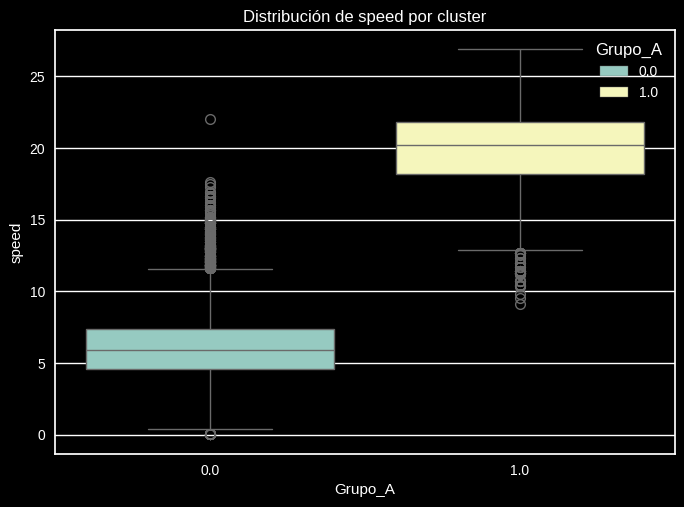

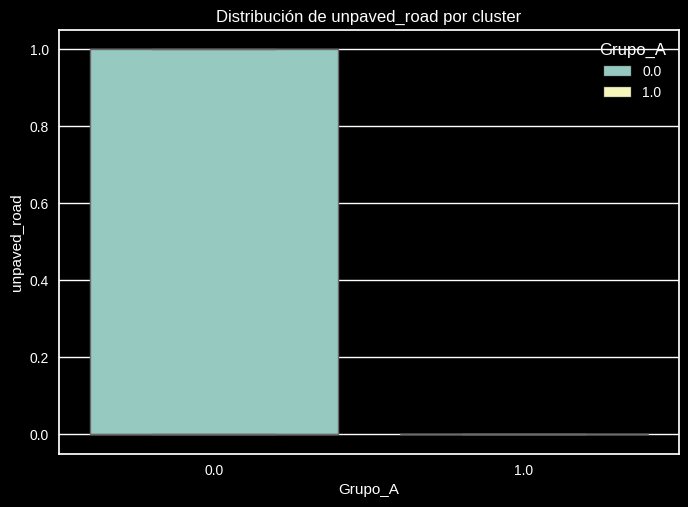

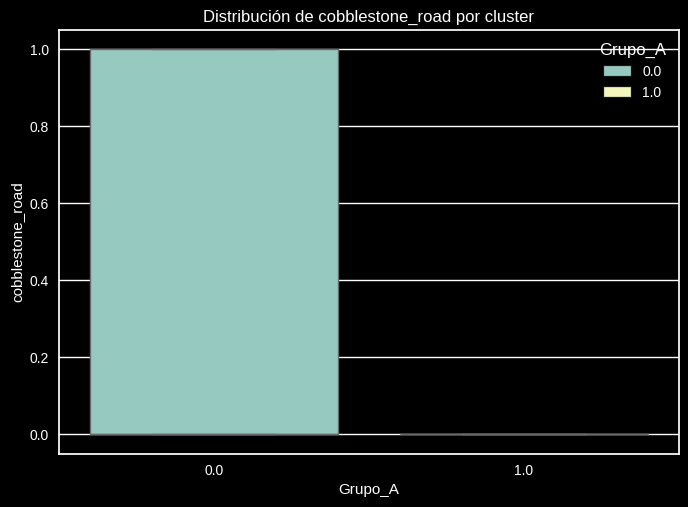

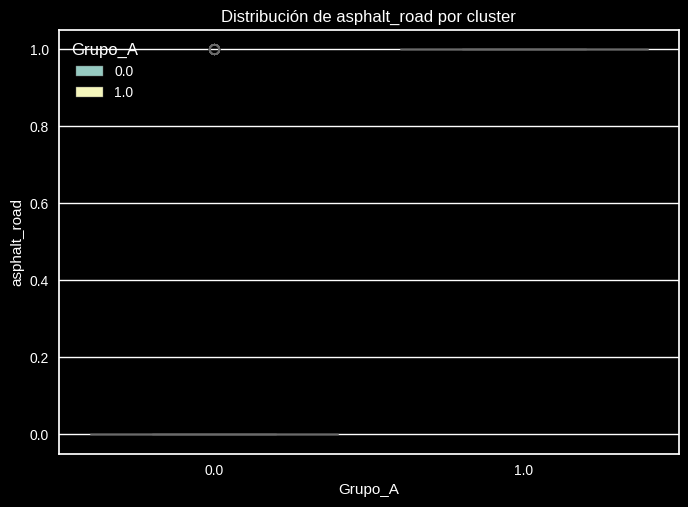

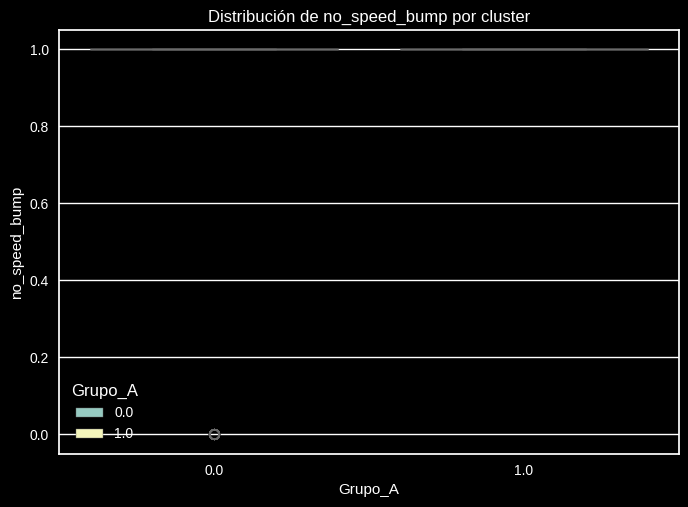

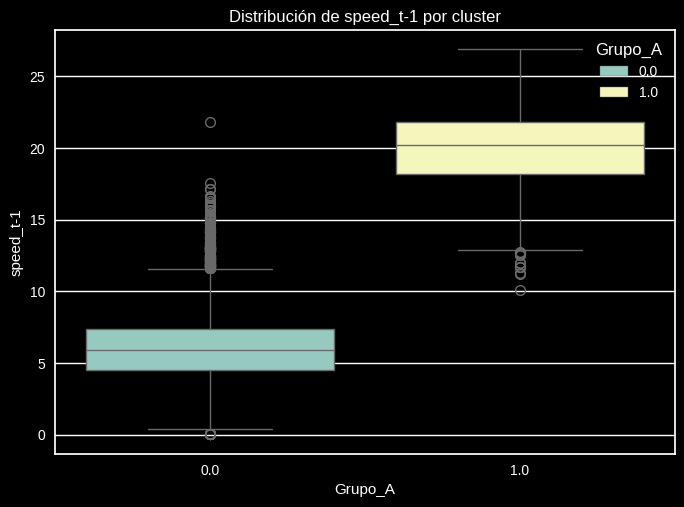

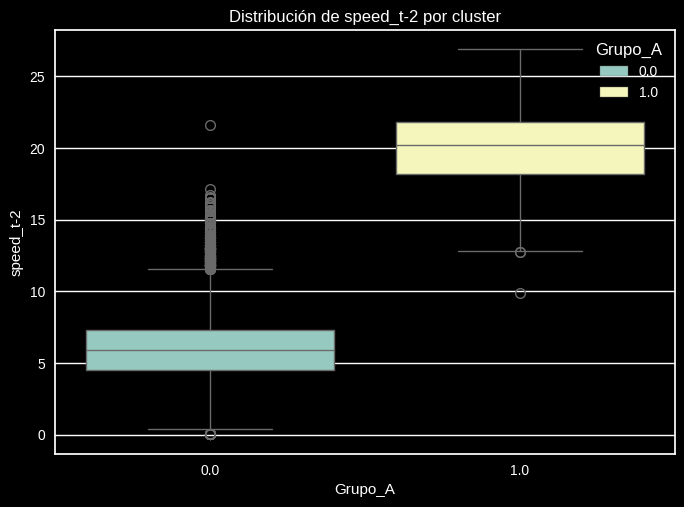

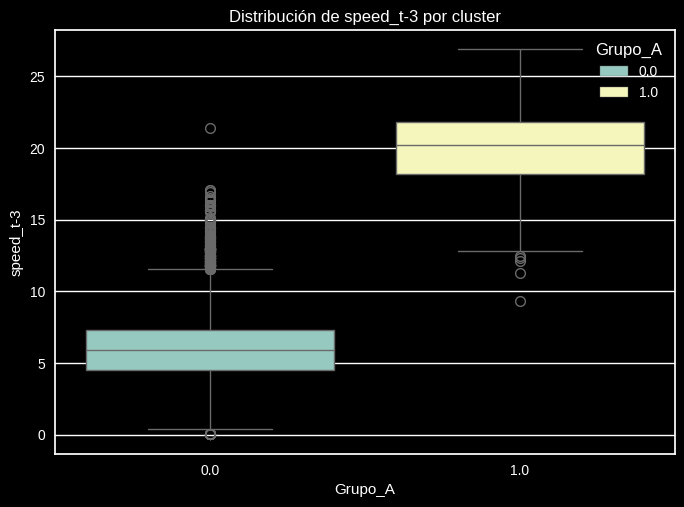

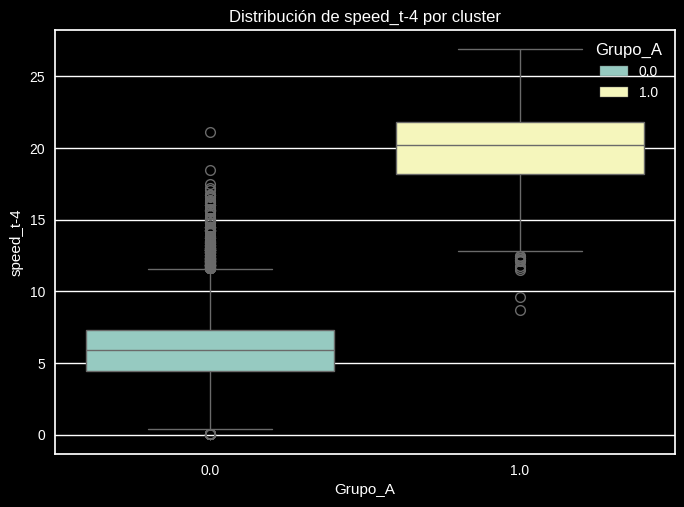

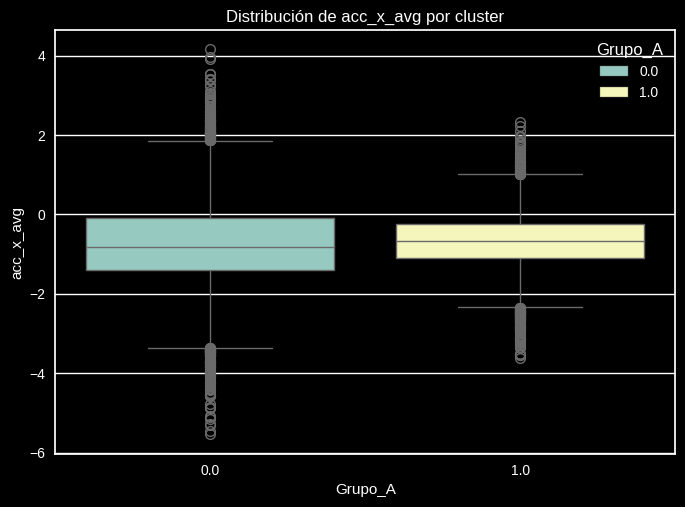

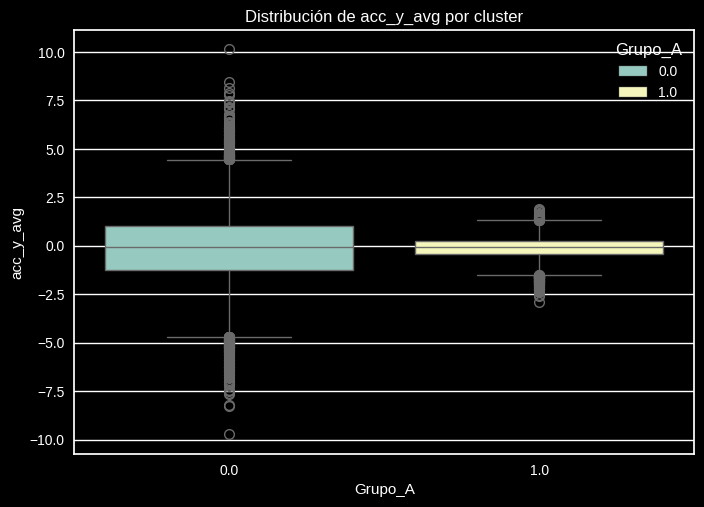

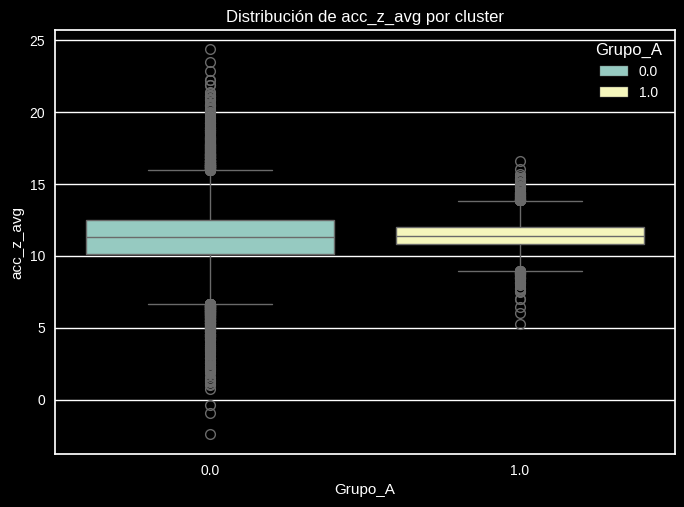

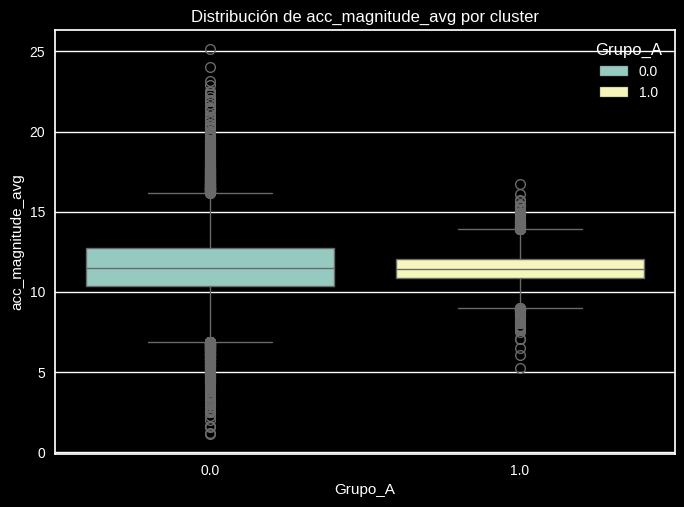

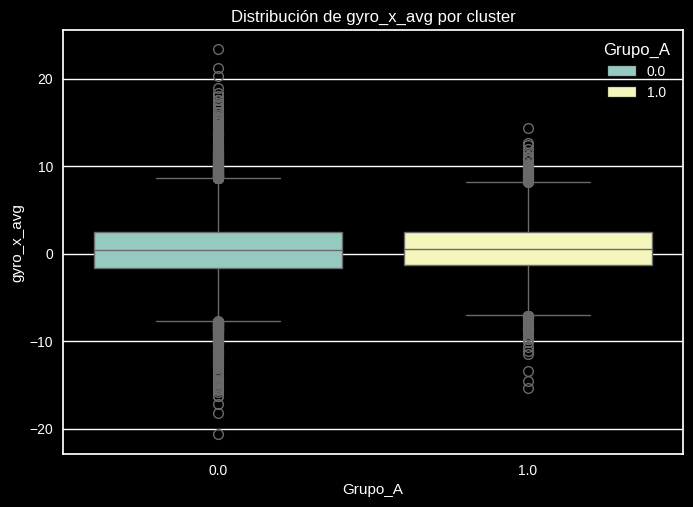

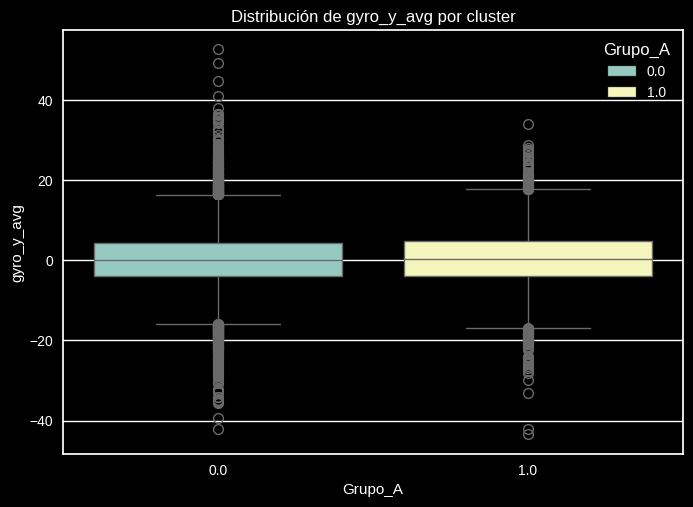

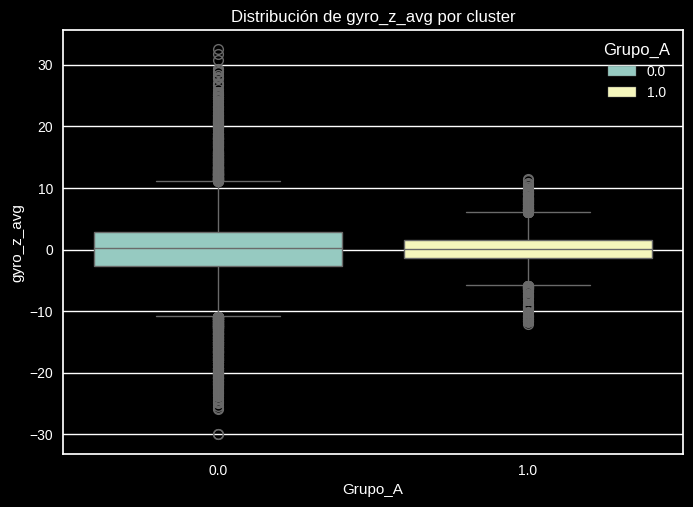

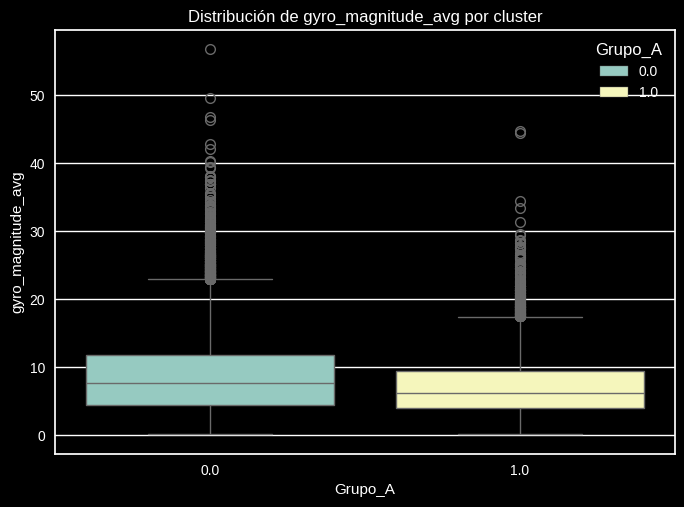

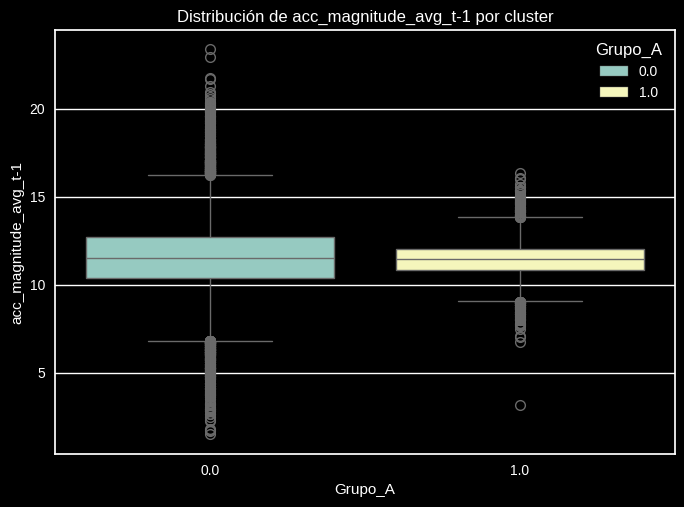

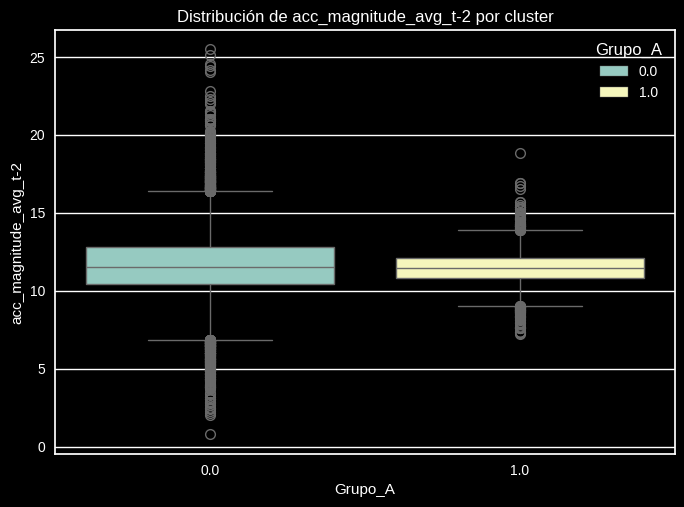

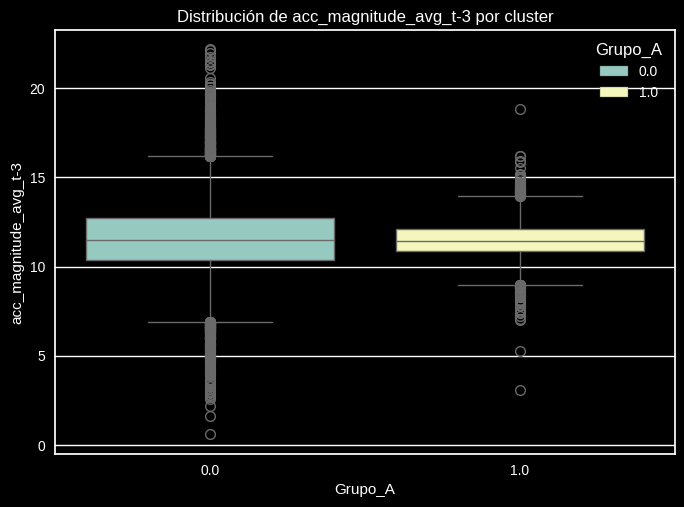

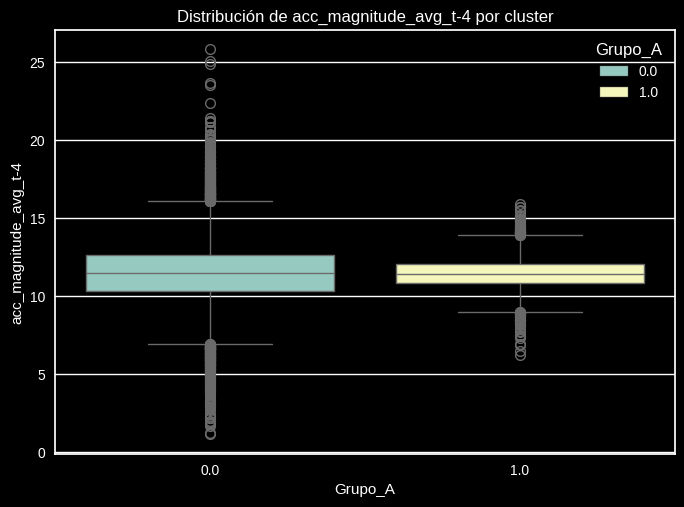

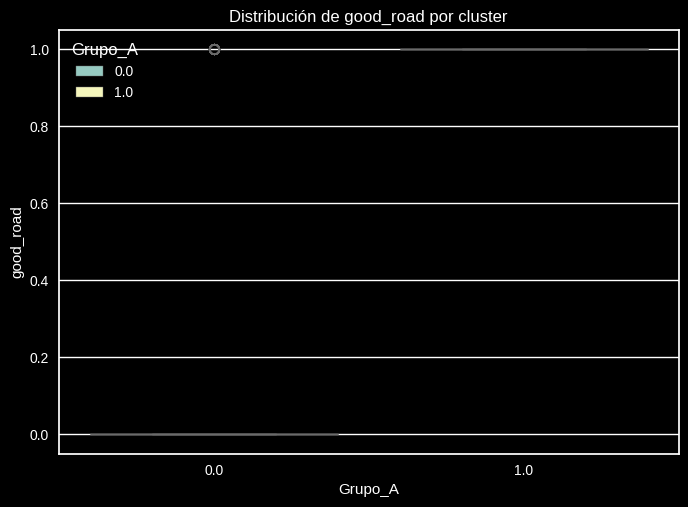

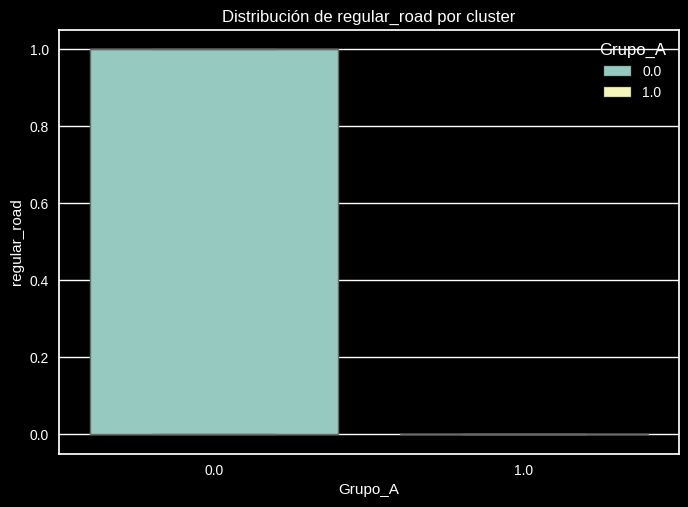

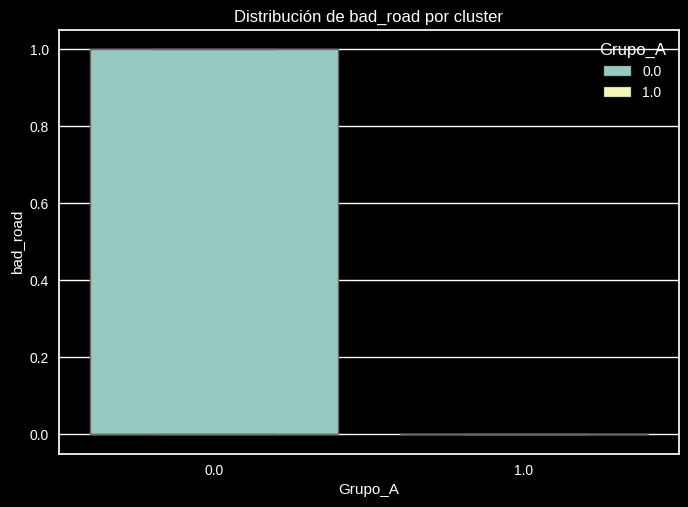

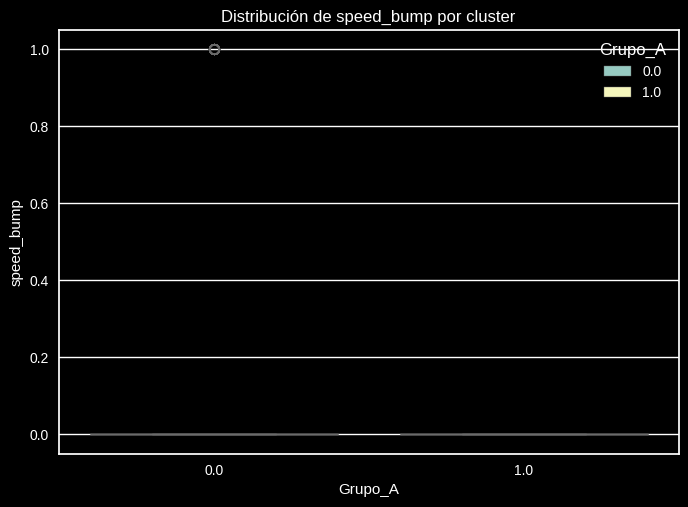

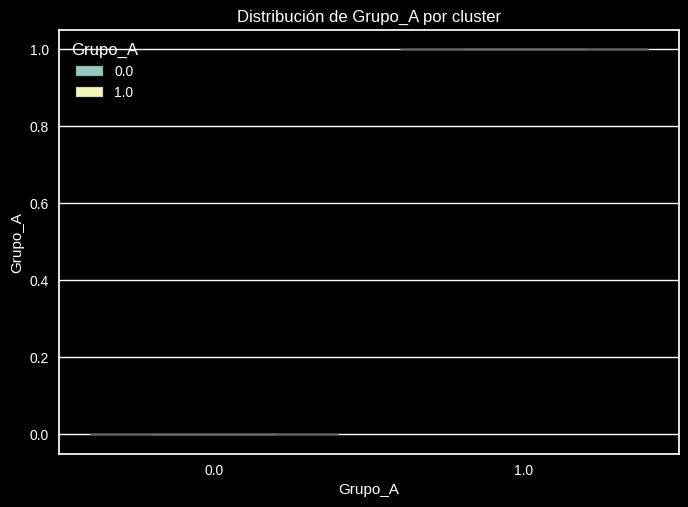

In [51]:
aux = df_an_Group.drop(columns = ['timestamp','latitude','longitude','Speed_Target']).columns

for v in aux:
    sns.boxplot(data = df_an_Group, x = 'Grupo_A', y = v, hue = 'Grupo_A')
    plt.title(f'Distribución de {v} por cluster')
    plt.show()

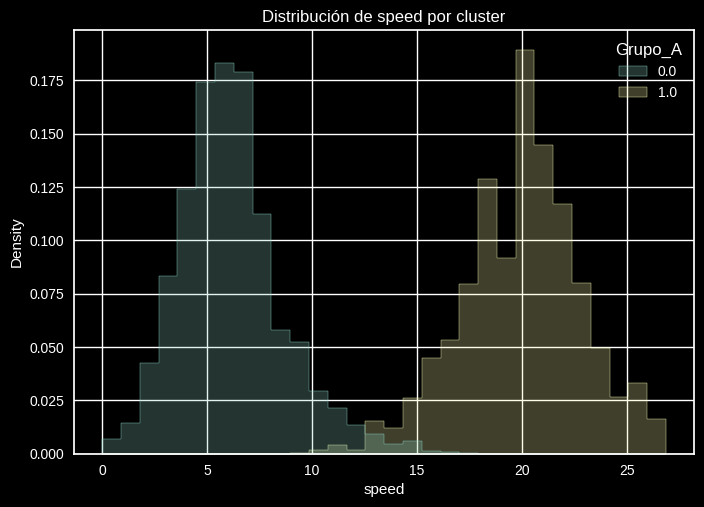

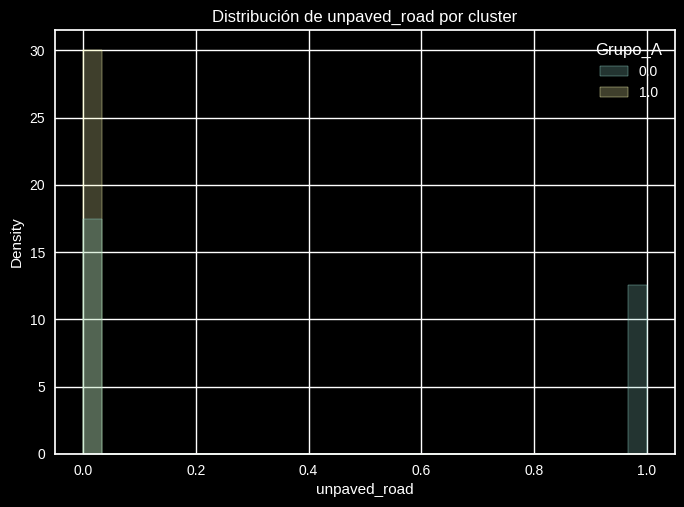

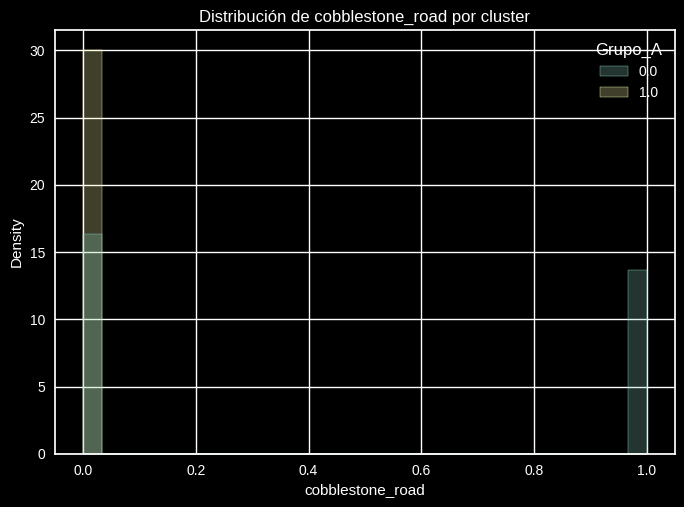

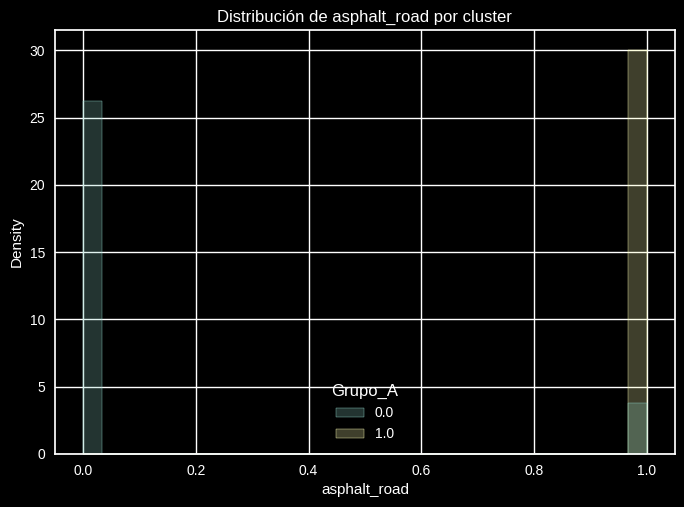

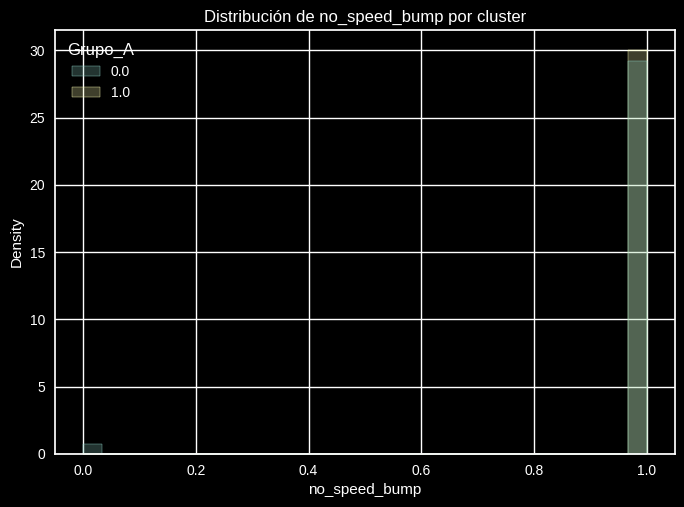

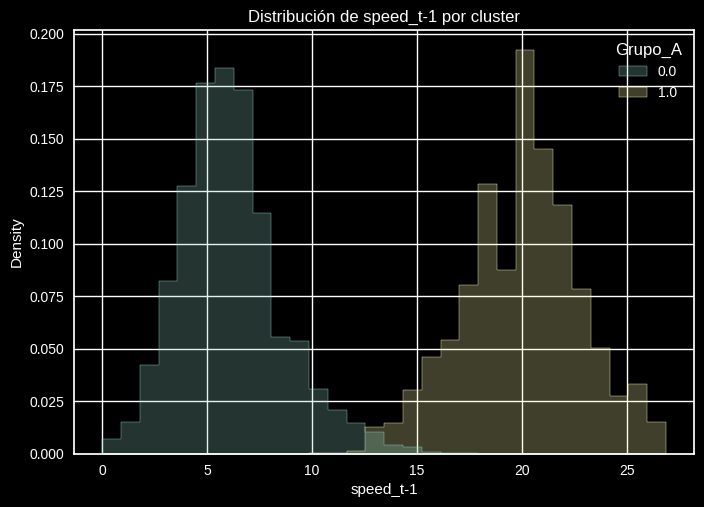

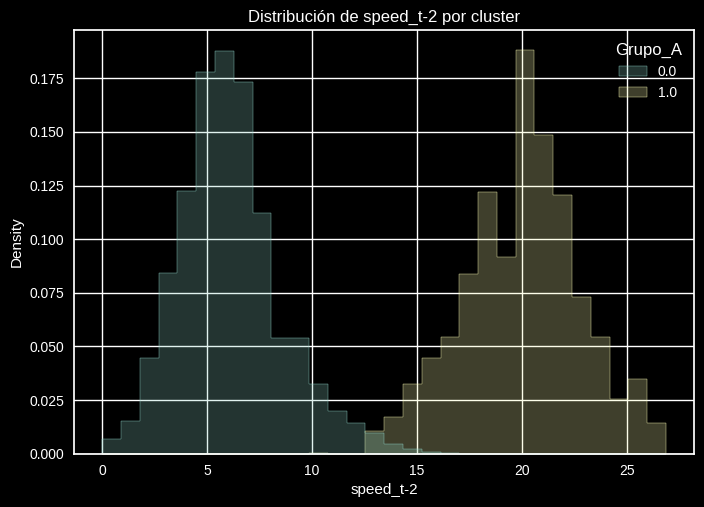

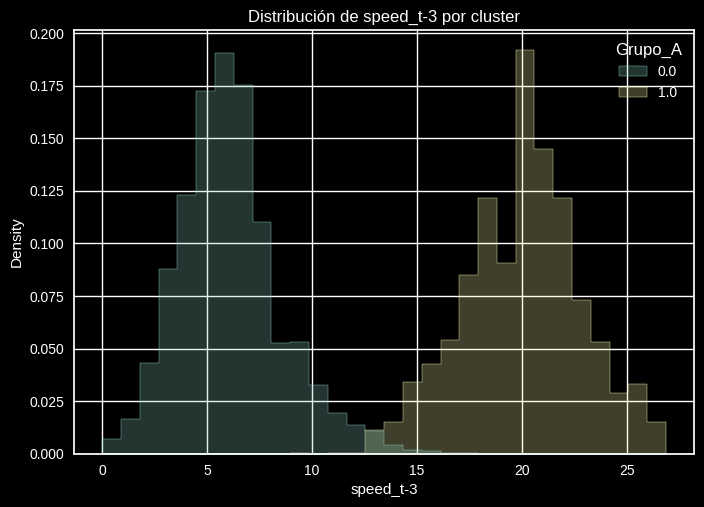

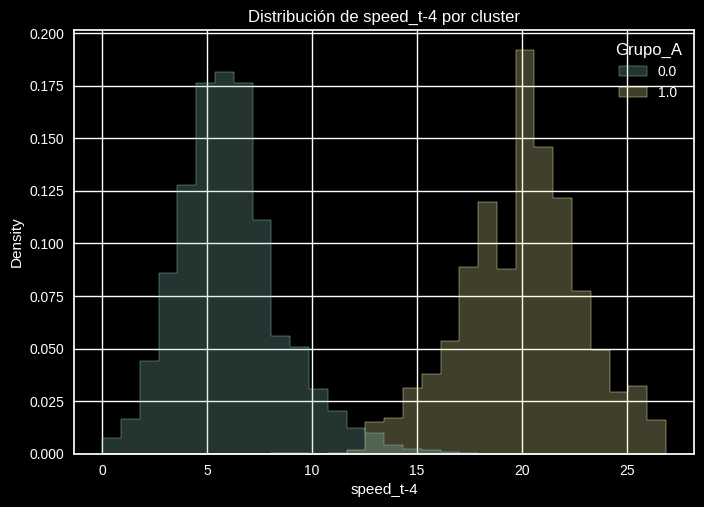

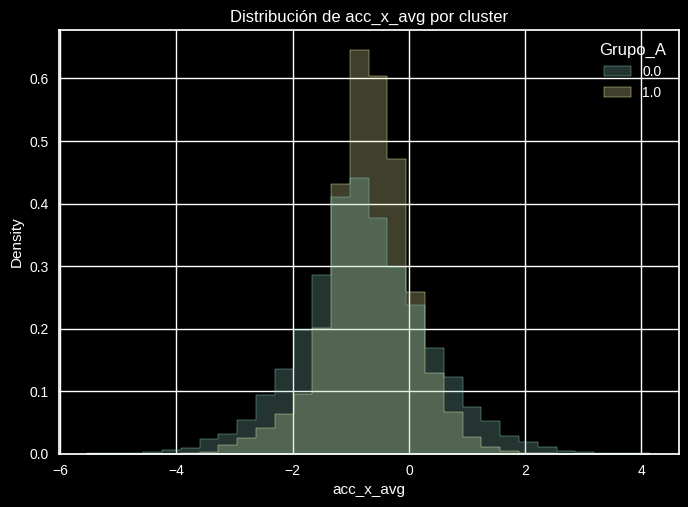

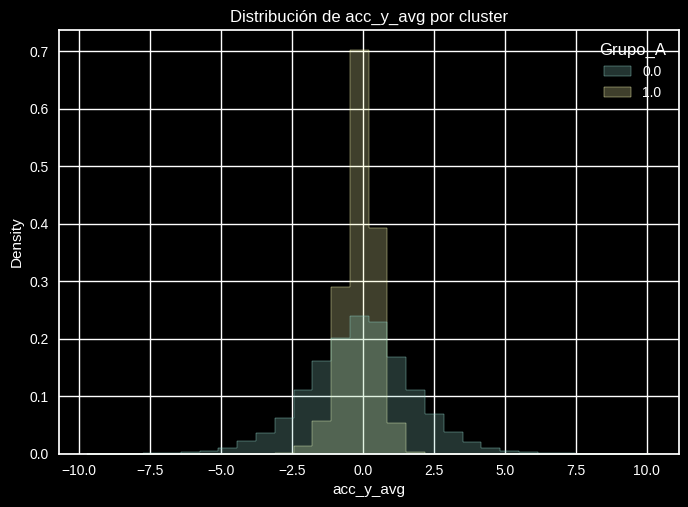

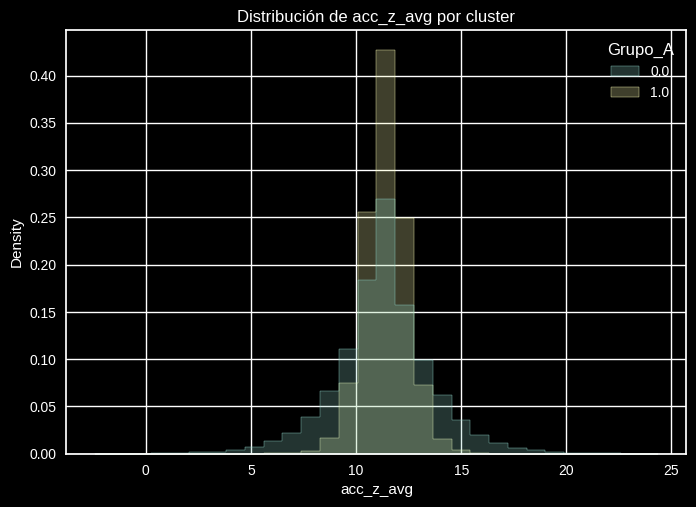

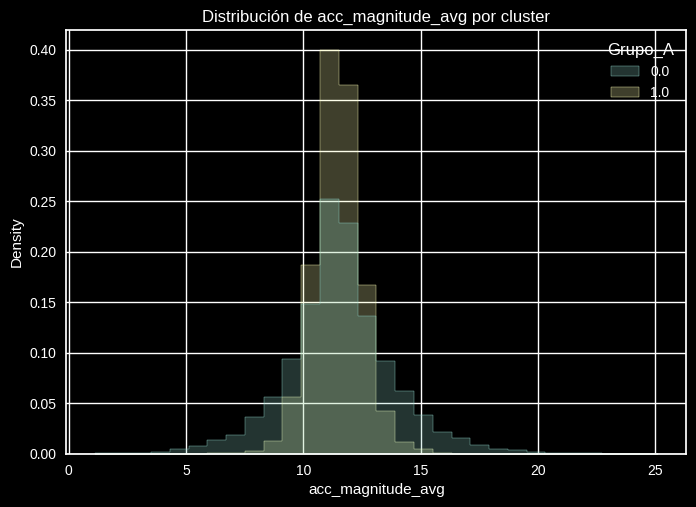

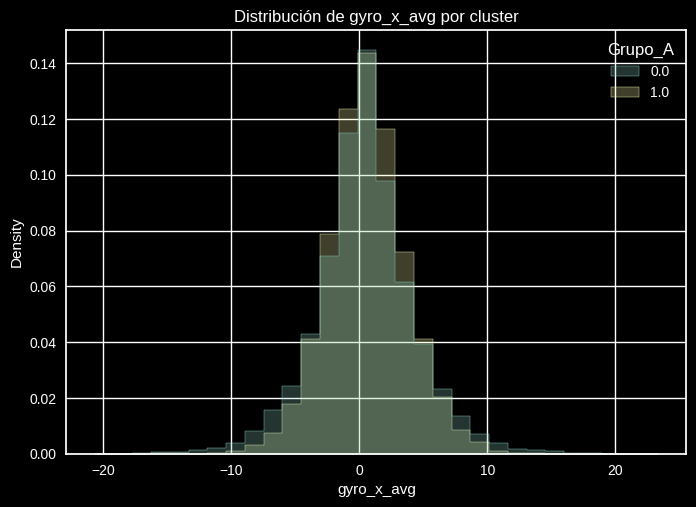

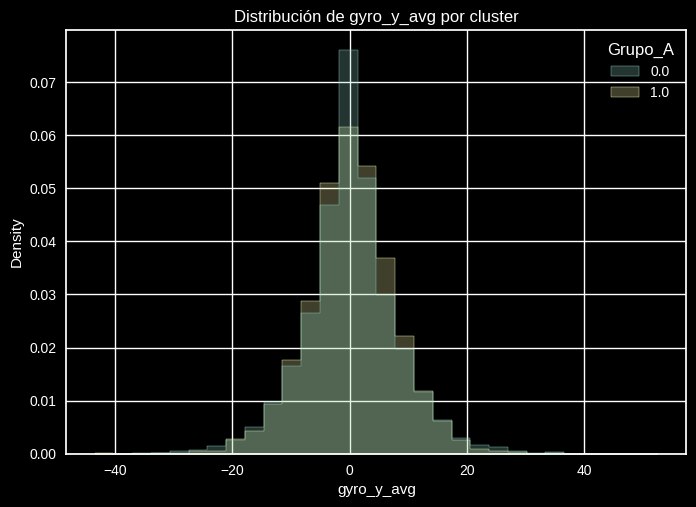

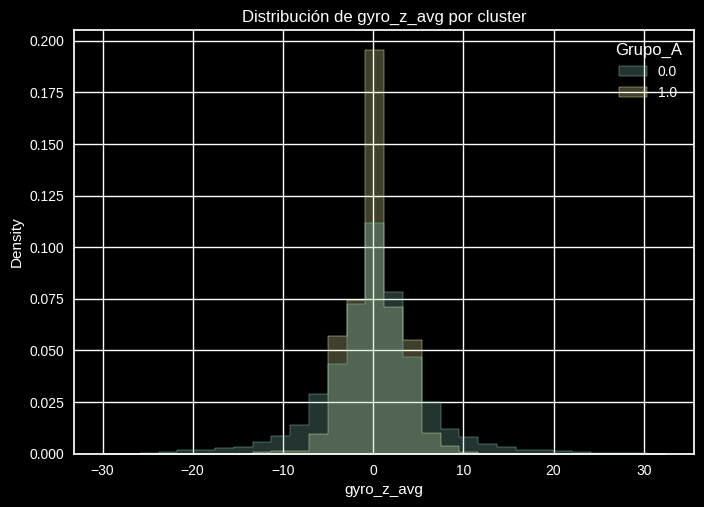

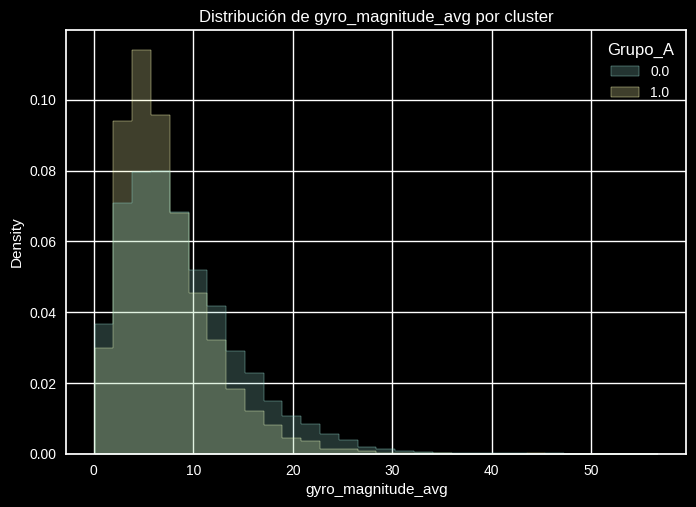

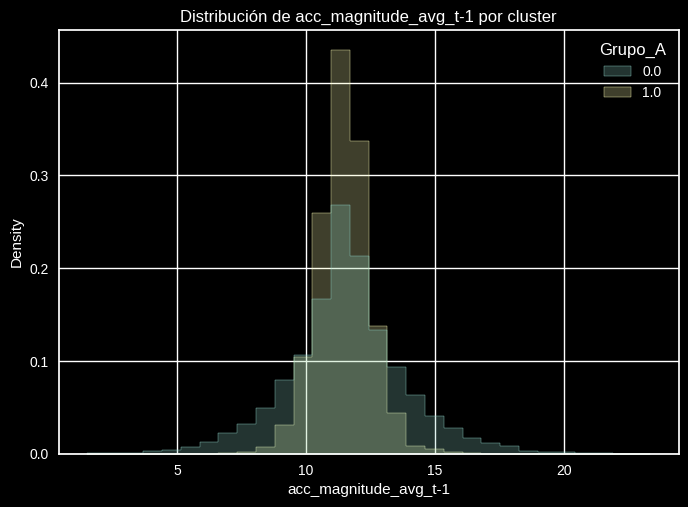

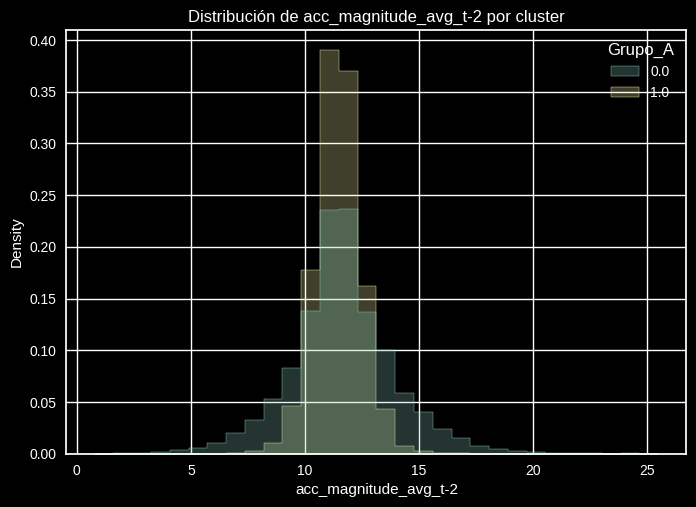

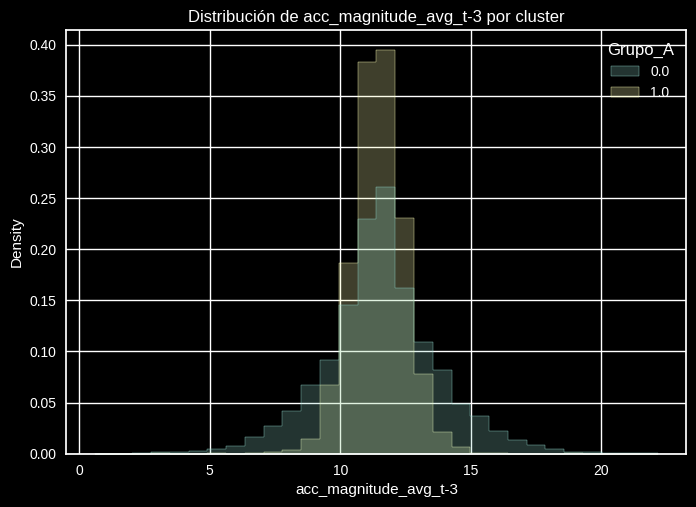

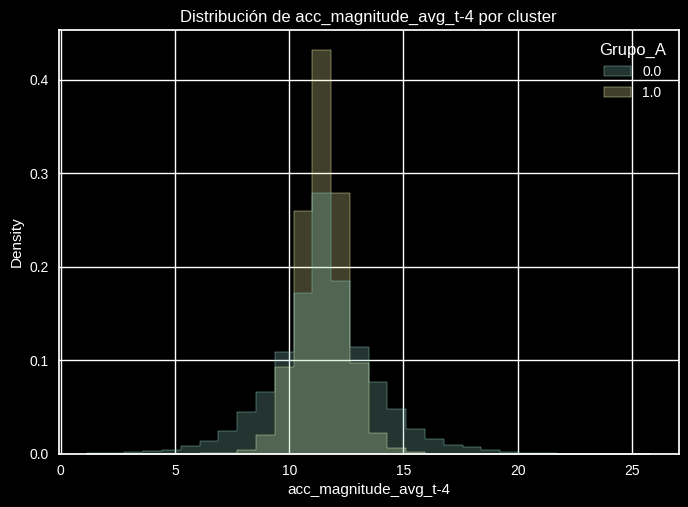

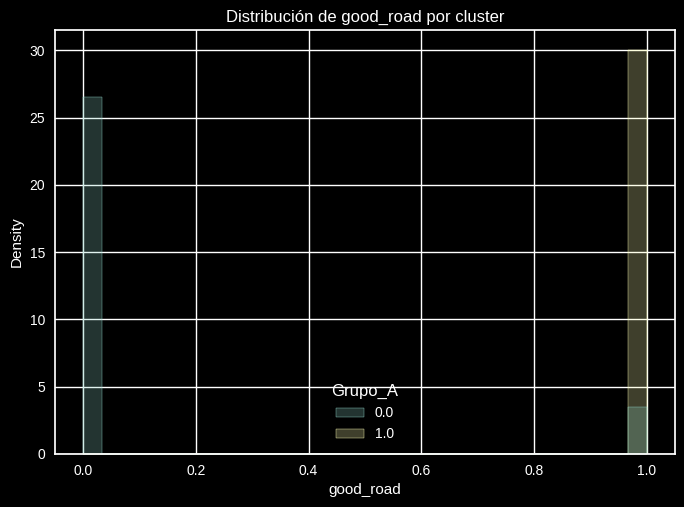

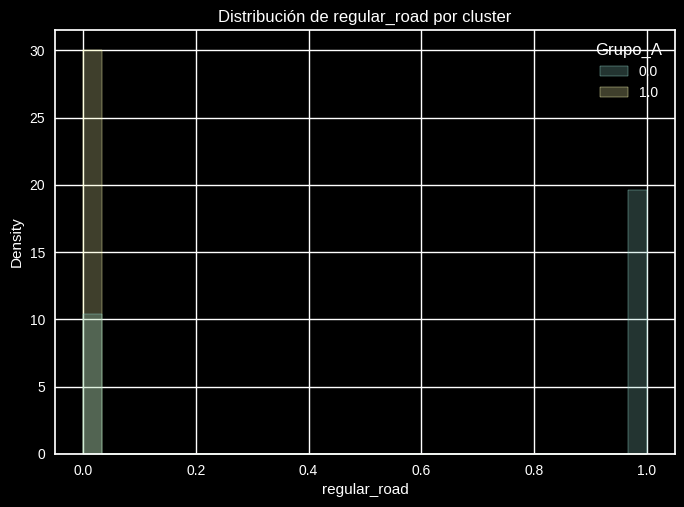

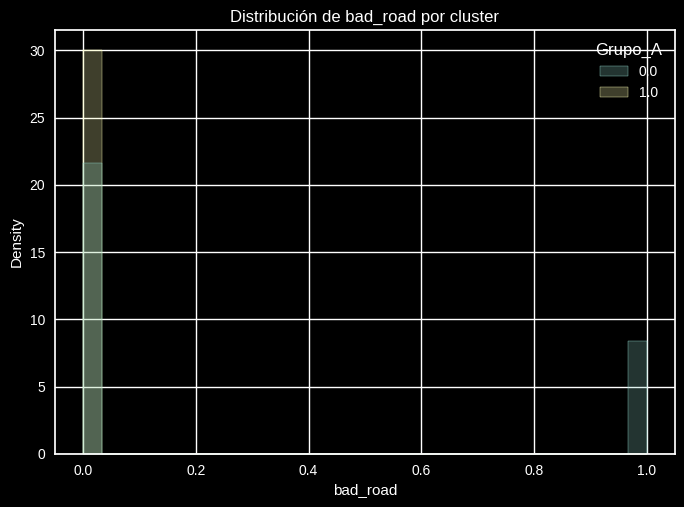

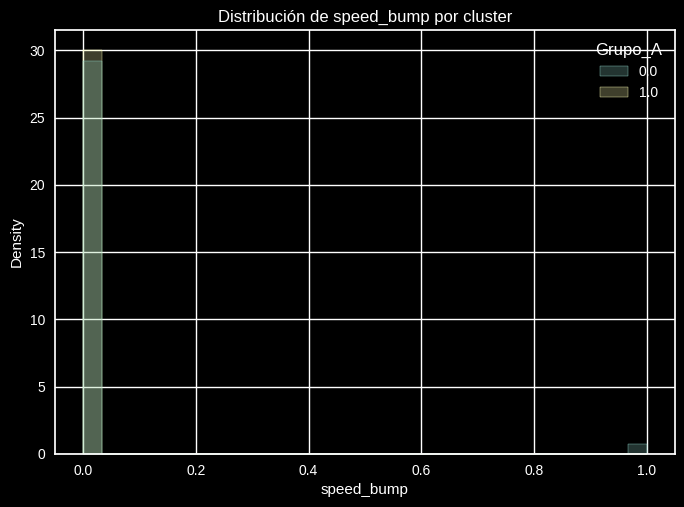

In [53]:
aux = df_an_Group.drop(columns = ['timestamp','latitude','longitude','Speed_Target','Grupo_A']).columns

for v in aux:
    sns.histplot(data = df_an_Group, x = v, hue = 'Grupo_A', bins=30, element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {v} por cluster')
    plt.show()

## Clustering de Optimizacion

In [55]:
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
range_clusters = range(2,10)

for i in range_clusters:
    km = KMeans(n_clusters=i, init = 'k-means++', n_init = 10, max_iter = 300, random_state=seed)
    c_labels = km.fit_predict(X_sample)
    sil_avg = silhouette_score(X_sample, c_labels)
    silhouette_scores.append(sil_avg)
    davies_bouldin_ = davies_bouldin_score(X_sample, c_labels); 
    davies_bouldin_scores.append(davies_bouldin_)
    calinski_harabasz_ = calinski_harabasz_score(X_sample, c_labels); 
    calinski_harabasz_scores.append(calinski_harabasz_)

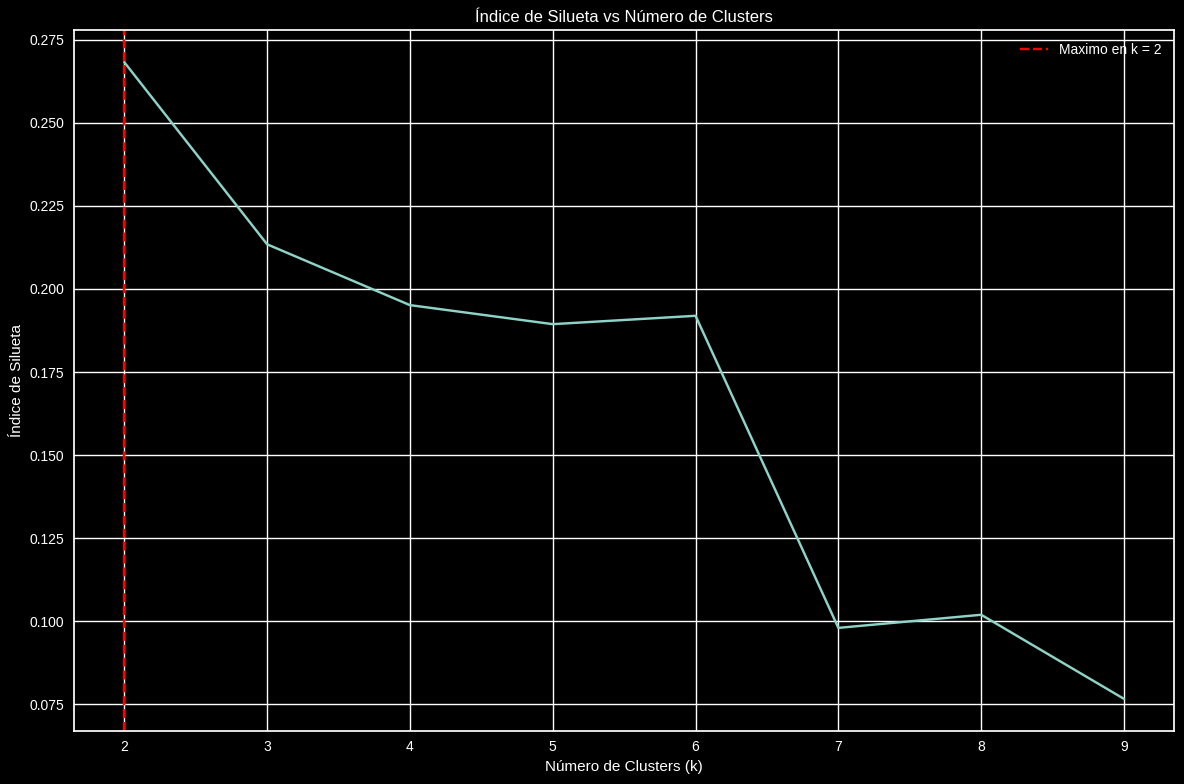

In [56]:
max_score = max(silhouette_scores)
best = range_clusters[silhouette_scores.index(max_score)]
plt.style.use('dark_background')
plt.figure(figsize = (12,8))
plt.plot(range_clusters, silhouette_scores,linestyle='-')
plt.axvline(x = best, color = 'red', linestyle='--', label = f'Maximo en k = {best}')
plt.title('Índice de Silueta vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silueta')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

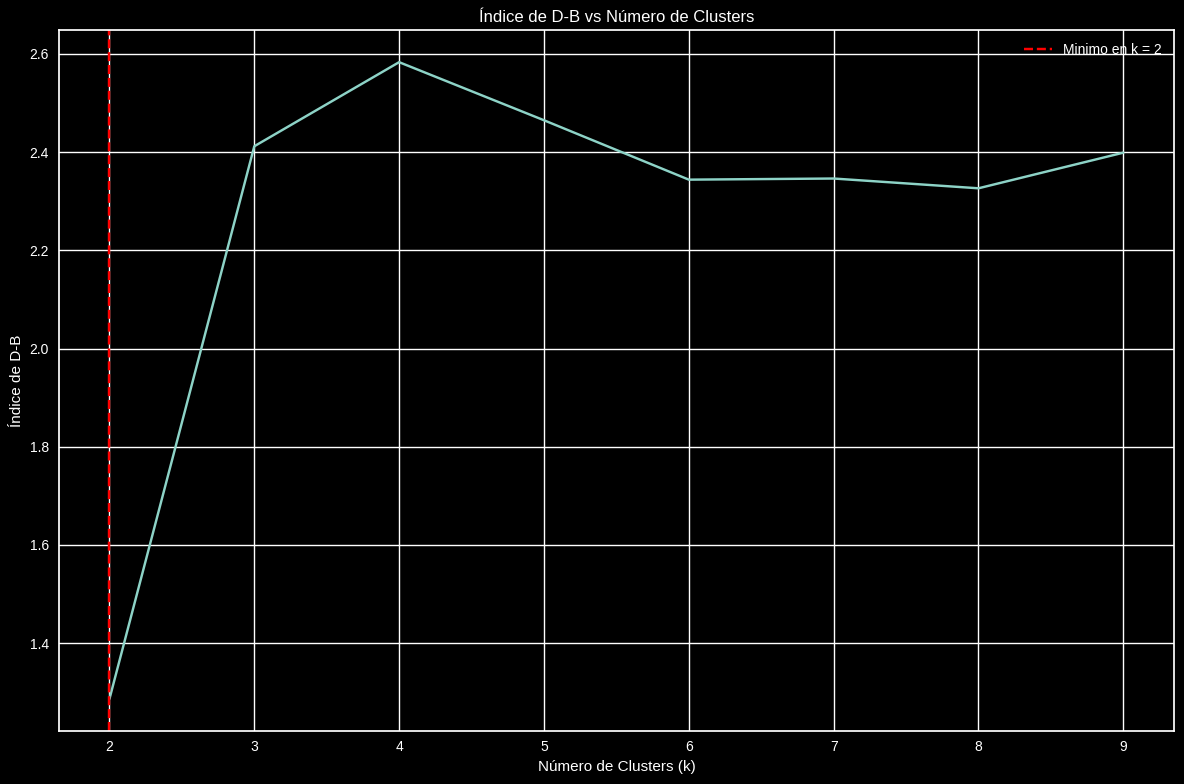

In [57]:
min_score = min(davies_bouldin_scores)
best = range_clusters[davies_bouldin_scores.index(min_score)]
plt.style.use('dark_background')
plt.figure(figsize = (12,8))
plt.plot(range_clusters, davies_bouldin_scores,linestyle='-')
plt.axvline(x = best, color = 'red', linestyle='--', label = f'Minimo en k = {best}')
plt.title('Índice de D-B vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de D-B')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

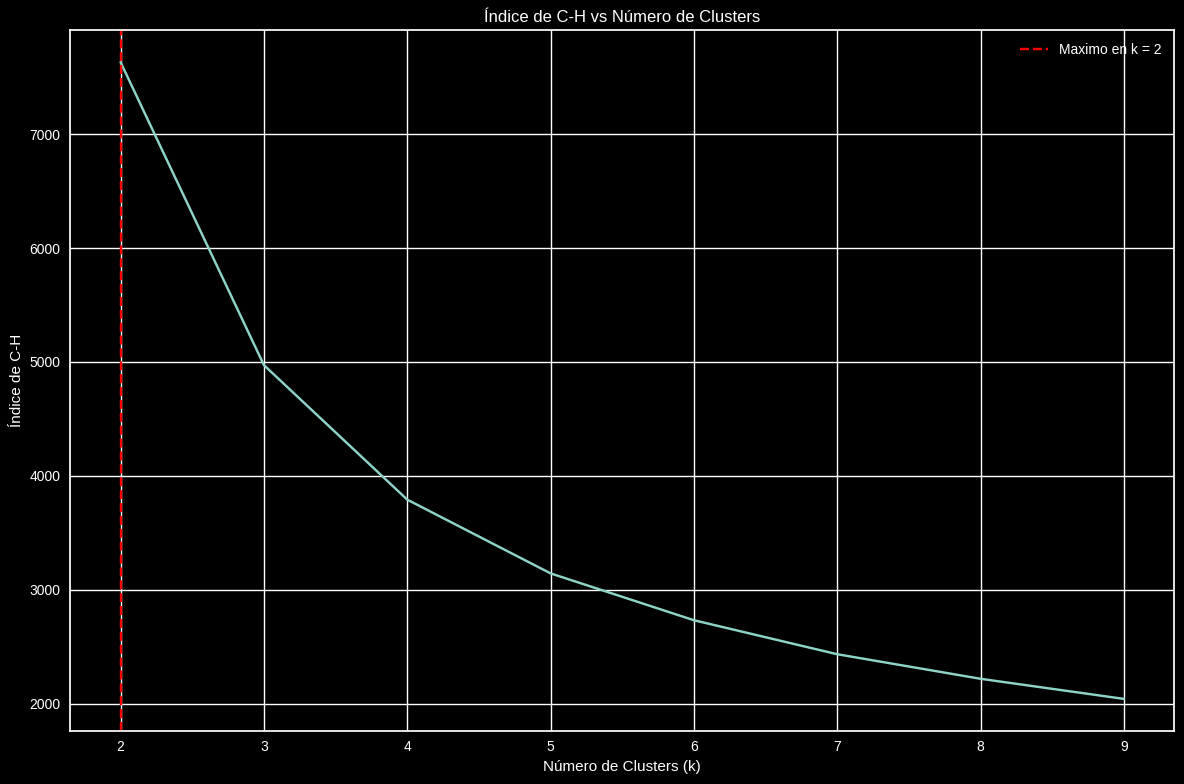

In [58]:
max_score = max(calinski_harabasz_scores)
best = range_clusters[calinski_harabasz_scores.index(max_score)]
plt.style.use('dark_background')
plt.figure(figsize = (12,8))
plt.plot(range_clusters, calinski_harabasz_scores,linestyle='-')
plt.axvline(x = best, color = 'red', linestyle='--', label = f'Maximo en k = {best}')
plt.title('Índice de C-H vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de C-H')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

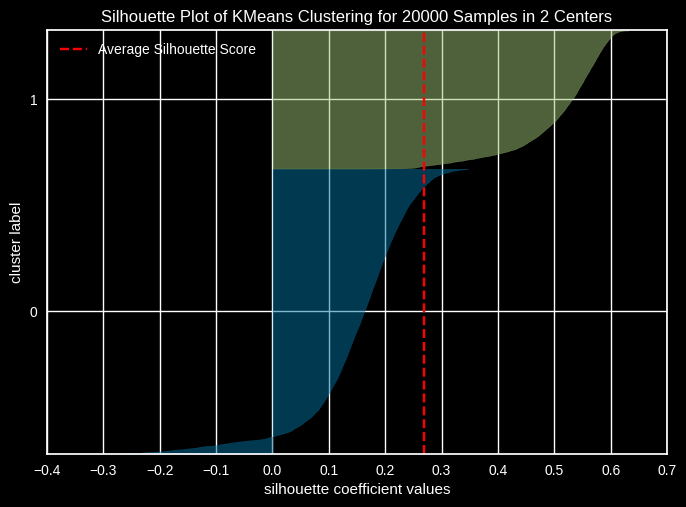

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 20000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
km = KMeans(n_clusters=2, init='k-means++', max_iter = 300,random_state=seed)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X_sample)
visualizer.show()

In [60]:
X_sample['Grupo_km'] = km.labels_

In [61]:
X_sample[X_sample['Grupo_km'] == X_sample['Grupo_A']]

,speed,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,good_road,regular_road,bad_road,speed_bump,Grupo_A,Grupo_km
66933,-0.517742,-0.438918,-0.424303,-0.405688,-0.362701,0.008788,0.160070,-1.208017,-1.298169,0.329328,0.299477,0.608825,-0.699185,-0.800483,-0.629725,2.597929,0.415123,0,1,0,1,0,0,1,0,0,0
342015,1.449937,1.449932,1.443105,1.437082,1.431483,-0.274439,-0.382776,-0.289453,-0.348877,-0.312230,1.223940,0.066470,0.266908,-0.115083,0.630396,-0.546772,-0.584388,0,0,1,1,1,0,0,0,1,1
243923,1.461980,1.458039,1.455060,1.464670,1.463970,1.193319,0.140127,0.217083,0.130482,0.089719,0.842935,0.024711,-0.263703,-0.685366,-0.141348,-0.171111,0.642185,0,0,1,1,1,0,0,0,1,1
79422,-0.905110,-0.726457,-0.626270,-0.554781,-0.545112,1.531612,1.648758,-0.738616,-0.664521,-0.732609,0.581258,-0.936736,-0.240664,1.035973,-0.254088,0.131319,0.454692,0,1,0,1,0,0,1,0,0,0
2358,1.129648,1.078287,1.024856,0.974088,0.902335,0.374007,0.483922,0.085946,0.006600,0.875183,0.968748,0.073513,0.048152,-0.447131,0.516403,0.225964,-0.168812,0,0,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268043,-0.549151,-0.561382,-0.549651,-0.546425,-0.545641,0.962325,0.329898,0.763688,0.683071,-0.777979,-0.127249,0.295889,-0.953797,0.597881,-1.573969,-1.961843,1.045127,1,0,0,1,0,1,0,0,0,0
260411,1.646222,1.665201,1.699136,1.713461,1.722288,-1.095911,-0.286574,0.316717,0.305063,0.346342,0.352979,0.726385,-0.573986,-0.259366,-0.242068,-0.534498,-1.570716,0,0,1,1,1,0,0,0,1,1
170939,-0.737937,-0.859210,-0.848568,-0.916697,-0.966712,1.344954,1.340585,0.316650,0.320808,-0.487329,0.542023,-0.648956,-0.485409,-0.054834,2.512065,-1.498855,-0.170607,1,0,0,1,0,1,1,0,0,0
264390,0.654250,0.758929,0.810386,0.851178,0.887931,0.025591,-0.795931,0.172460,0.133974,0.537037,-0.537113,-0.094023,-0.638845,-0.492716,0.629776,-0.206332,0.005378,0,0,1,1,1,0,0,0,1,1


In [63]:
X_sample[X_sample['Grupo_km'] != X_sample['Grupo_A']]

,speed,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,good_road,regular_road,bad_road,speed_bump,Grupo_A,Grupo_km
323193,0.639534,0.690858,0.632143,0.535632,0.439331,-0.184754,-0.168798,-0.149209,-0.220610,-0.304432,-1.239458,0.000059,0.229942,-0.398339,-0.128790,-0.307990,0.382846,0,0,1,1,1,0,0,0,0,1
191533,0.640158,0.589479,0.551830,0.509611,0.494050,-1.083832,-0.691702,-0.226718,-0.211332,-0.921177,0.141562,1.241237,-0.211965,-0.737690,-0.319605,-0.905771,-0.181097,0,0,1,1,1,0,0,0,0,1
133247,-0.342571,0.042323,0.379782,0.589832,0.810686,-1.218056,-1.960768,-0.332760,-0.098522,-0.009528,-0.103254,1.262368,-0.312822,-0.115018,0.037263,0.018580,0.092223,0,0,1,1,1,0,0,0,0,1
226097,0.239877,0.357721,0.379201,0.376594,0.360884,-0.649983,-0.293723,-0.464706,-0.507574,-0.162651,0.090654,0.502165,-0.982052,-0.469912,-0.466779,0.031501,-0.020872,0,0,1,1,1,0,0,0,0,1
194804,0.391330,0.383060,0.296764,0.201012,0.096904,-0.386798,0.699781,0.183287,0.141928,-1.630790,-0.249170,0.046848,-0.465159,-0.593209,0.098285,-0.753964,-0.164017,0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228241,0.625492,0.670654,0.679897,0.578697,0.475134,-0.587628,-0.218844,0.330816,0.283331,-0.980725,-0.890880,-0.006985,-0.145400,-0.054312,-0.216305,-0.358580,-0.275954,0,0,1,1,1,0,0,0,0,1
131517,0.523272,0.410777,0.295585,0.196338,0.128435,0.050088,0.511641,-0.218420,-0.290903,0.378242,0.449933,-0.127732,-0.741185,-0.591167,-0.103707,-0.273351,-0.198748,0,0,1,1,1,0,0,0,0,1
108662,0.200715,0.221815,0.272350,0.308926,0.240394,-0.803034,0.125452,0.361576,0.322813,-0.122243,0.143832,0.534364,-0.928252,-0.090064,0.160936,-0.052313,0.120726,0,0,1,1,1,0,0,0,0,1
194952,0.364939,0.391735,0.383643,0.297579,0.202160,0.041990,-0.522878,-0.690856,-0.756089,-0.385956,0.119513,0.210863,-1.149651,-0.376091,-0.256615,-0.160744,-0.306060,0,0,1,1,1,0,0,0,0,1
